# **Introduction**

Strategies for dealing with missing data are a necessary component of the analysis of any new dataset. In most cases, rather than removing records containing missing values, the preferred method is making an educated guess as to what the missing value might be and imputing the datapoint with a best guess estimate. Imputation is a method that preserves the useful data present within a dataset, while providing machine learning algorithms with the complete data they demand.

Like any other phenomena, missing data follows predictable patterns. The imputation strategy that the analyst applies should take into account why the data is missing. To accurately identify the latent patterns causing missing data, the analyst must carefully observe the data that is present for patterns. Data can be missing at random, missing not at random, and missing completely at random. While these categories appear to be very similar, knowing the differences in the patterns they describe can make the difference that leads to a high performing model. 

# **Types of Missing Data**

A commonly occuring kind of "missingness" is data that is missing at random. When missing data occur randomly, without a noticeable pattern, but the missing data can be modeled, then they are considered missing at random. The existing data can be used to fit a model that predicts what these values may be. 

Data that is missing not at random means that the probability of "missingness" is not random, but is not known. An example of this phenomenon is missing data due to a sensor wearing out over time. We may not have a model that accurately predicts when missing data will occur, but we do know that it will occur.

Data that is missing completely at random is a less common occurance. All data points have an equal probability of "missingness", which cannot be predicted, and the cause of the missingness is unknown. An example of data that is missing completely at random are data not inlcuded in the random sample of a population. 

# **The Dataset**
The dataset is composed of over 30,471 Russian home prices with 292 continuous and categorical features to inform home price predictions. Approximately 47% of the entire dataset is missing data, distributed over 51 columns. Missing datapoints are either missing at random or missing not at random.

# **Imputation Methods**

Given that the focus of this study is on imputation methods, we will not delete records from the dataset. Instead, we will explore the dataset for patterns that allow us to interpolate the missing data we observe. The primary means of imputing the data will be univariate inference and Scikit-Learn implementations of a KNN imputation approach and the Iterative Imputation\footnotemark.

\footnotetext{https://scikit-learn.org/stable/modules/impute.html}



## Comparing Multiple Imputation Strategies

There are many multiple imputation strategies available and this case study focuses on two in particular, Iterative Imputation and KNN Imputation. The primary difference between the two methods is that iterative imputation uses multiple linear regression as the primary imputation technique while KNN imputation uses a K Nearest Neighbor approach with a euclidean distance metric.

To perform the comparisons, we selected features to impute, trained Sci-kit Learn's IterativeImputer and KNNImputer using the same training sets and random states, fit linear models to both training sets, and used the Root Mean Squared Error as the evaluation metric. 

While the performance of KNNImputer is consistently better, the RMSE of both methods is quite similar. The primary difference between the two is computation time. The computational time of IterativeImputer, while not visualized, is faster than KNNImputer. IterativeImputer will perform much better on large datasets while KNNImputer, with a time complexity of O(N^2), may not be practical.

![imputation strategy analysis](./images/imputation_strategies.png)

Figure C: A Comparison of the RMSE of Iterative and KNN Imputation Strategies

### **Cafe Variables**

A set of variables related to cafe prices are missing values.
The variables, `cafe_sum_X_min_price_avg`, `cafe_sum_X_max_price_avg`, and `cafe_avg_price_X`, represent the minimum, maximum, and average cafe bills in a given `X` radius.
As shown in Fig. X, these variables are highly correlated for any given radius.
Since these variables are highly correlated, we will drop the minimum and maximum columns and keep only the average price column, namely `cafe_avg_price_X`.

![cafe_pair_plot](./images/cafe_sum_500_X_pairplot.png)



Figure X: Pair plot of cafe_sum_500_min_price_avg, cafe_sum_500_max_price_avg, and cafe_avg_price_500.
These variables are strongly correlated.
The other similar cafe variables exhibit similar behavior.


There is also a set related complete columns `cafe_count_X`, which provide a count of the cafes in the given radius `X`.
Most of the `cafe_avg_price_X` values are missing when `cafe_count_X==0`, which is sensible.
We will set `cafe_avg_price_X` to `-1` when `cafe_count_X==0` as a numeric indication that `cafe_avg_price_X` is missing.
However, there are missing values present when `cafe_count_X` is not equal to `0`.
The missingness of `cafe_count_X` appears to be related to `sub area` and `cafe_count_X`.
Fig. Y shows that the missingness of `cafe_avg_price_500` is related to `sub_area` and `cafe_count_500`.
The other similar variables exhibit similar behavior.
There does not appear to be a pattern beyond this relationship.

![heatmap](./images/cafe_500_heatmap.png)


Figure Y: Heatmap of missing count of cafe_avg_price_500 by sub_area and cafe_count_500 (sub_area is indexed). 
The missingness of cafe_avg_price_500 appears to depend on both sub_area and cafe_count_500.


We used the median value to impute these values.
The distributions of `cafe_avg_price_X` variables appear to be irregular as shown in Fig. Z.
The imputation strategy was as follows:

* For each `cafe_count_X`:
  * If `cafe_count_X==0`, set `cafe_avg_price_X` to -1 to indicate a null value
  * If `cafe_count_X > 0` and all values of `cafe_avg_price_X` are missing, set `cafe_avg_price_X` to `-1` to indicate null values
  * Else, use median of `cafe_avg_price_X` values corresponding to the levels of `cafe_count_X` and levels of `sub_area`

![cafe distributions](./images/distributions_of_caf_avg_price_col.png)


Figure Z: Distributions of several cafe_avg_price_X variables by cafe_count_X


### Walking Distance Features

Five walking distance features each have 25 missing data points. A Pearson's R correlation matrix reveals multicollinearity between features that account for walking distance and those that account for the time it takes to walk from one point to another. We will remove the walking time measurements, `metro_min_walk` and `railroad_station_walk_min` because they are the more subjective of the two.

![correlations of walking distance features](./images/corr_walking_dist.png)

Figure A: Pearson's R Correlations of Wakling Distance Features

## Build_Count Features

The dataset also contains a large number of features that represent counts of homes with specific building materials. These features are counts of homes with materials, we will assume that missing values means that those materials are absent and we will impute them with 0 values. A more detailed justification of this decision is provided below.

Each of these features contain 4,991 missing values. The sub_area feature was appended to the build_count dataframe, revealing that sub-areas with the Polesenskie prefix contain all of the missing values across all of the build_count features. Of the subset of features having at least 1 missing value, a majority of the missing values were found to be in the `build_count_foam` and `build_count_panel`. Additionally, a correlation matrix revealed that `raion_build_count_with_builddate_info` and `raion_build_count_with_material_info` are almost perfectly correlated, so we chose to remove `raion_build_count_with_builddate_info` from the dataset.

## School Seat Count Features

### preschool_quota
`preschool_quota` values were missing for all Poselenie sub_areas (neighborhoods) in addition to Molzhaninovskoe and Troickij okrug. Further analysis showed there are preschool-aged children in these sub_areas, but the corresponding `preschool_education_centers_raion` - a feature for the number of pre-school institutions - is 0. Therefore, we assume these values are not missing at random and are intentionally left empty because there are no seats available in pre-school organizations. Thus, we impute all missing values for these `preschool_quota` with 0.

### school_quota
As with preschool_quota, missing values for school_quota appear to be missing not at random; the values missing correspond to the Poselenie and Troickij okrug `sub_area` values. In these districts, `school_education_centers_raion` and `school_education_centeres_top_20_raion` all have values of 0 where `school_quota` values are missing. Therefore, we interpret this as there being no school seats available and impute them with 0.

## State Feature
We identified that `state` – a feature representing the quality of the location - is a feature that is not missing at random random. The missing values were not associated with any other feature, such as a particular `timestamp` range, `sub_area` value, or `product_type`. We imputed missing `state` values with a K-NN classifier, which produced reasonable accuracy (61%) on internal cross-validation when using features that appeared in the top 95th percentile of correlation to the `state` values, by Pearson’s Coefficient of Correlation, as the predictors.

# Missing at Random
#### max_floor
#### kitch_sq
#### material
#### floor
#### num_room
#### build_year
#### state

# Missing Not at Random
#### school_quota
#### preschool_quota

# Modeling

Something on modeling, what model, tuning, etc.

# Results

Whatever we have for results, I guess the model

# Conclusions

# Appendix A: Imputations

In [2]:
import time
from collections import defaultdict

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

random_state = 42

In [38]:
df = pd.read_csv('./data/train.csv')
df.shape

(30471, 292)

### Performing train/test split to avoid data leakage

In [39]:
y = df.pop('price_doc')
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state)
dfs = {'X_train: ': X_train, 
       'X_test: ': X_test,
       'y_train: ': y_train,
       'y_test: ': y_test}
for i,j in dfs.items():
    print(i, j.shape)

X_train:  (24376, 291)
X_test:  (6095, 291)
y_train:  (24376,)
y_test:  (6095,)


## Imputation Code

In [34]:
############################################ Paul's Imputation decisions; see appendix B for KNN classification model imputations
X_train.loc[:,'school_quota'] = X_train.loc[:,'school_quota'].fillna(0)
X_train.loc[:,'preschool_quota'] = X_train.loc[:,'preschool_quota'].fillna(0)

X_test.loc[:,'school_quota'] = X_test.loc[:,'school_quota'].fillna(0)
X_test.loc[:,'preschool_quota'] = X_test.loc[:,'preschool_quota'].fillna(0)

In [35]:
############################################ Justin's Imputation decisions
# KNN imputation helper functions
def KNN_train_impute(correlation_matrix, colname, data, n_neighbors=3):
    """given a pandas correlation matrix, the function fits a
       KNNimputer object using the two most correlated features to the 
       given column, then returns an imputed pandas Dataframe
    """
    sorted_corr = correlation_matrix[colname].sort_values(ascending=False)
    top_corr = sorted_corr.index[:2]
    KNNimp = KNNImputer(n_neighbors=n_neighbors)
    KNNimputed = KNNimp.fit_transform(data[top_corr])
    return KNNimputed[:,0], KNNimp

def KNN_test_impute(correlation_matrix, colname, data, fitted_imputer):
    """ given a pandas correlation matrix and a fitted KNN imputer object,
       the function transforms the given columns
    """
    sorted_corr = correlation_matrix[colname].sort_values(ascending=False)
    top_corr = sorted_corr.index[:2]
    KNNimputed = fitted_imputer.transform(data[top_corr])
    return KNNimputed[:,0]

names = X_train.columns
# imputing build_count features
string = ['build_count']
build_cols = [i for i in names if any(sub in i for sub in string)]
for i in build_cols:
    X_train[i].fillna(0, inplace=True)
X_train = X_train.drop('raion_build_count_with_builddate_info', axis = 1)
X_test = X_test.drop('raion_build_count_with_builddate_info', axis = 1)

# imputing sq_ft features
sq_ft_features = ['life_sq', 'full_sq', 'num_room', 'kitch_sq', 'floor', 'max_floor']
full_sq_data = X_train[sq_ft_features]

KNNimp = KNNImputer(n_neighbors = 3)
KNNimp.fit(full_sq_data)

KNNimp_train = KNNimp.transform(full_sq_data)
X_train['life_sq'] = KNNimp_train[:,0]
X_train['full_sq'] = KNNimp_train[:,1]
X_train['num_room'] = KNNimp_train[:,2]
X_train['kitch_sq'] = KNNimp_train[:,3]
X_train['floor'] = KNNimp_train[:,4]
X_train['max_floor'] = KNNimp_train[:,5]
KNNimp_test = KNNimp.transform(X_test[sq_ft_features])
X_test['life_sq'] = KNNimp_test[:,0]
X_test['full_sq'] = KNNimp_test[:,1]
X_test['num_room'] = KNNimp_test[:,2]
X_test['kitch_sq'] = KNNimp_test[:,3]
X_test['floor'] = KNNimp_test[:,4]
X_test['max_floor'] = KNNimp_test[:,5]

# walking features 
walking = [i for i in X_train.columns if any(sub in i for sub in ['walk'])]
walking.append('sub_area')
droppers = ['metro_min_walk','railroad_station_walk_min']
X_train = X_train.drop(droppers, axis = 1)
X_test = X_test.drop(droppers, axis = 1)
walking = [ 'metro_km_walk',
            'railroad_station_walk_km',
            'ID_railroad_station_walk']
corr = X_train.corr()

imputer_dict = dict()
for i in walking:
    X_train[i], imputer_dict[i] = KNN_train_impute(corr, colname = i, data = X_train)
    X_test[i] = KNN_test_impute(corr, colname = i, data= X_test, fitted_imputer = imputer_dict[i])

# prom feature
correlation_matrix = X_train.corr()
n_neighbors = 3
sorted_corr = correlation_matrix['prom_part_5000'].sort_values(ascending=False)
top_corr = sorted_corr.index[:2]
KNNimp = KNNImputer(n_neighbors=n_neighbors)
KNNimputed = KNNimp.fit_transform(X_train[top_corr])

X_train['prom_part_5000'] = KNNimputed[:,0]
KNN_test_imputed = KNNimp.transform(X_test[top_corr])
X_test['prom_part_5000'] = KNN_test_imputed[:,0]

In [20]:
for i in X_test.columns:
    print(i, sum(pd.isna(X_train[i])), '\n')

id 0 

timestamp 0 

full_sq 0 

life_sq 0 

floor 126 

max_floor 7661 

material 7661 

build_year 10881 

num_room 0 

kitch_sq 7661 

state 10843 

product_type 0 

sub_area 0 

area_m 0 

raion_popul 0 

green_zone_part 0 

indust_part 0 

children_preschool 0 

preschool_quota 0 

preschool_education_centers_raion 0 

children_school 0 

school_quota 0 

school_education_centers_raion 0 

school_education_centers_top_20_raion 0 

hospital_beds_raion 11557 

healthcare_centers_raion 0 

university_top_20_raion 0 

sport_objects_raion 0 

additional_education_raion 0 

culture_objects_top_25 0 

culture_objects_top_25_raion 0 

shopping_centers_raion 0 

office_raion 0 

thermal_power_plant_raion 0 

incineration_raion 0 

oil_chemistry_raion 0 

radiation_raion 0 

railroad_terminal_raion 0 

big_market_raion 0 

nuclear_reactor_raion 0 

detention_facility_raion 0 

full_all 0 

male_f 0 

female_f 0 

young_all 0 

young_male 0 

young_female 0 

work_all 0 

work_male 0 

work_

In [188]:
########################################### Stuart's imputation decisions

# impute the training data
caf_avg_price_cols = ['cafe_avg_price_500', 'cafe_avg_price_1000', 'cafe_avg_price_1500',
                  'cafe_avg_price_2000', 'cafe_avg_price_3000', 'cafe_avg_price_5000']
caf_count_cols = ['cafe_count_500', 'cafe_count_1000', 'cafe_count_1500',
                      'cafe_count_2000', 'cafe_count_3000', 'cafe_count_5000']
# find levels with missing values
missing_levels = dict()
for count_col in caf_count_cols:
    missing_levels[count_col] = np.unique(X_train[X_train[caf_avg_price_cols + caf_count_cols].isna().any(axis=1)][caf_count_cols][count_col])
# find levels with missing values
sub_areas = dict()
for price_col in caf_avg_price_cols:
    sub_areas[price_col] = np.unique(X_train[X_train[[price_col] + ['sub_area']].isna().any(axis=1)].sub_area)
# save imputed values
imputes = defaultdict(lambda: -1)
# loop over training data to impute training data and save impute values
for caf_avg_price_col, caf_count_col in zip(caf_avg_price_cols, caf_count_cols):
    for i in missing_levels[caf_count_col]:
        for sub_area in sub_areas[caf_avg_price_col]:
            idxes = X_train.query('sub_area == ' + '"' + sub_area + '"')[X_train[caf_avg_price_col].isna() & (X_train[caf_count_col]==i)][caf_avg_price_col].index
            # when value of count col is 0 set avg col to -1
            if i == 0:
                X_train.loc[idxes, caf_avg_price_col] = -1
                imputes[caf_avg_price_col + str(i) + sub_area] = -1
            else: # else use the median ignoring the nans
                if np.all(np.isnan(X_train[X_train[caf_count_col]==i][caf_avg_price_col])):
                    X_train.loc[idxes, caf_avg_price_col] = -1
                    imputes[caf_avg_price_col + str(i) + sub_area] = -1
                else:
                    X_train.loc[idxes, caf_avg_price_col] = np.nanmedian(X_train[X_train[caf_count_col]==i][caf_avg_price_col])
                    imputes[caf_avg_price_col + str(i) + sub_area] = np.nanmedian(X_train[X_train[caf_count_col]==i][caf_avg_price_col])

# impute the test data
missing_levels = dict()
for count_col in caf_count_cols:
    missing_levels[count_col] = np.unique(X_test[X_test[caf_avg_price_cols + caf_count_cols].isna().any(axis=1)][caf_count_cols][count_col])

sub_areas = dict()
for price_col in caf_avg_price_cols:
    sub_areas[price_col] = np.unique(X_test[X_test[[price_col] + ['sub_area']].isna().any(axis=1)].sub_area)
    
for caf_avg_price_col, caf_count_col in zip(caf_avg_price_cols, caf_count_cols):
    for i in missing_levels[caf_count_col]:
        for sub_area in sub_areas[caf_avg_price_col]:
            idxes = X_test.query('sub_area == ' + '"' + sub_area + '"')[X_test[caf_avg_price_col].isna() & (X_test[caf_count_col]==i)][caf_avg_price_col].index
            X_test.loc[idxes, caf_avg_price_col] = imputes[caf_avg_price_col + str(i) + sub_area]

In [36]:
# drop the collinear columns
cafe_min_max_cols = ['cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg',
                     'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg',
                     'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg',
                     'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg',
                     'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg',
                     'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg',]

X_train = X_train.drop(cafe_min_max_cols, axis=1)
X_test = X_test.drop(cafe_min_max_cols, axis=1)

In [37]:
for i in X_train.columns:
    print(i, sum(pd.isna(X_train[i])), '\n')

id 0 

timestamp 0 

full_sq 0 

life_sq 0 

floor 0 

max_floor 0 

material 7661 

build_year 10881 

num_room 0 

kitch_sq 0 

state 10843 

product_type 0 

sub_area 0 

area_m 0 

raion_popul 0 

green_zone_part 0 

indust_part 0 

children_preschool 0 

preschool_quota 0 

preschool_education_centers_raion 0 

children_school 0 

school_quota 0 

school_education_centers_raion 0 

school_education_centers_top_20_raion 0 

hospital_beds_raion 11557 

healthcare_centers_raion 0 

university_top_20_raion 0 

sport_objects_raion 0 

additional_education_raion 0 

culture_objects_top_25 0 

culture_objects_top_25_raion 0 

shopping_centers_raion 0 

office_raion 0 

thermal_power_plant_raion 0 

incineration_raion 0 

oil_chemistry_raion 0 

radiation_raion 0 

railroad_terminal_raion 0 

big_market_raion 0 

nuclear_reactor_raion 0 

detention_facility_raion 0 

full_all 0 

male_f 0 

female_f 0 

young_all 0 

young_male 0 

young_female 0 

work_all 0 

work_male 0 

work_female 0

# Appendix B: Analysis

#### First, get list of all records with missing values. See if we can drop them all
#### Recognized there are no records without missing information
#### Next, if we can drop them all, we can run random forest to see which features are most important.
#### Finally, we can impute in order of importance; for most important features, we will impute them first, then work downward.

## A count of all missing values

In [5]:
# Take a copy of X_train and y_train to mimick the real 'df'
df = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
X_train_copy = X_train.copy()

In [6]:
nullList = df.isnull().sum()
na_list=nullList[nullList>0].sort_values(ascending=False)

In [107]:
print('Count of columns with missing values: {}\nCount of columns without missing values: {}'.format(nullList[nullList>0].sort_values(ascending=False).count(), nullList[nullList==0].sort_values(ascending=False).count()))

Count of columns with missing values: 49
Count of columns without missing values: 243


In [108]:
print('Percent of dataset records with null values: {}%'.format(round(nullList[nullList>0].max()/df.shape[0]*100, 2)))

Percent of dataset records with null values: 47.41%


### A dataframe of missing values and their data types for selecting imputation algorithm

### We're assuming not every neighborhood in Moscow has a hospital, just as not every neighborhood in Dallas has a hospital.

In [109]:
df_missing = pd.DataFrame(list(zip(na_list.index, na_list.values)), columns=['feature','na_count'])
df_dtypes = pd.DataFrame(list(zip(df.dtypes.index, X_train.dtypes)), columns=['feature','type'])
df_missing.merge(df_dtypes, how='inner', on='feature')

,feature,na_count,type
0,hospital_beds_raion,11557,float64
1,build_year,10881,float64
2,state,10843,float64
3,cafe_sum_500_min_price_avg,10584,float64
4,cafe_sum_500_max_price_avg,10584,float64
5,cafe_avg_price_500,10584,float64
6,max_floor,7661,float64
7,material,7661,float64
8,num_room,7661,float64
9,kitch_sq,7661,float64


In [110]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [7]:
df_cats = df.select_dtypes(include=['O'])
df_cats_test = df_test.select_dtypes(include=['O'])

In [8]:
df_cats2 = df_cats.drop('timestamp',axis=1)
df_cats2_test = df_cats_test.drop('timestamp',axis=1)

In [113]:
print('Categorical cardinality:\n\nFeature product_type:\n{}\n\nFeature ecology:\n{}\n\nFeature sub_area:\n{}'.format(df_cats['product_type'].unique(), df_cats['ecology'].unique(), df_cats['sub_area'].unique()))

Categorical cardinality:

Feature product_type:
['OwnerOccupier' 'Investment']

Feature ecology:
['good' 'no data' 'satisfactory' 'poor' 'excellent']

Feature sub_area:
['Nekrasovka' 'Poselenie Rogovskoe' 'Zjuzino' 'Chertanovo Juzhnoe'
 'Juzhnoe Butovo' 'Pokrovskoe Streshnevo' "Tekstil'shhiki" 'Otradnoe'
 'Zjablikovo' 'Jaroslavskoe' 'Tverskoe' 'Poselenie Sosenskoe'
 'Poselenie Shherbinka' "Kon'kovo" 'Poselenie Vnukovskoe' 'Ljublino'
 'Poselenie Moskovskij' 'Golovinskoe' 'Poselenie Voskresenskoe' 'Solncevo'
 'Jakimanka' 'Jasenevo' 'Ramenki' 'Akademicheskoe' 'Matushkino' 'Shhukino'
 'Fili Davydkovo' 'Preobrazhenskoe' 'Sviblovo' 'Caricyno' 'Brateevo'
 'Meshhanskoe' "Mar'ina Roshha" 'Perovo' "Kuz'minki" 'Kotlovka'
 'Orehovo-Borisovo Juzhnoe' 'Begovoe' 'Bogorodskoe' 'Ochakovo-Matveevskoe'
 'Pechatniki' 'Severnoe Tushino' 'Birjulevo Vostochnoe' 'Mitino'
 'Prospekt Vernadskogo' 'Severnoe Butovo' 'Poselenie Filimonkovskoe'
 'Zapadnoe Degunino' "Mar'ino" 'Poselenie Desjonovskoe' 'Bibirevo'
 'Ta

In [9]:
df_cats2['sub_area'].isnull().sum()

0

# One-hot and label encode

In [10]:
sub_area = df_cats2['sub_area'].astype('category')
sub_area_final = sub_area.cat.codes
sub_area_test = df_cats2_test['sub_area'].astype('category')
sub_area_final_test = sub_area_test.cat.codes

one_hots = df_cats2.drop('sub_area',axis=1)
one_hots_final = pd.get_dummies(one_hots)
one_hots_test = df_cats2_test.drop('sub_area',axis=1)
one_hots_final_test = pd.get_dummies(one_hots_test)

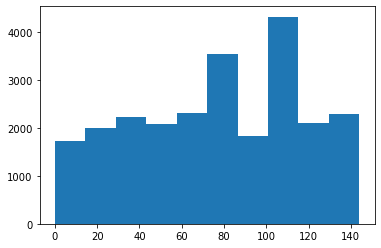

In [116]:
import matplotlib.pyplot as plt
plt.hist(sub_area.cat.codes);

In [117]:
sub_area.isna().sum()

0

In [11]:
encodes = pd.concat([sub_area_final,one_hots_final], axis=1).astype('int64')
encodes_test = pd.concat([sub_area_final_test,one_hots_final_test], axis=1).astype('int64')

# Get a list of the non-null values and run a model to predict price_doc
## Concatenate with encoded variables

In [119]:
print('time range: [{}, {}]'.format(df['timestamp'].min(),df['timestamp'].max()))

time range: [2011-08-20, 2015-06-30]


In [12]:
nullList = df.isnull().sum()
non_naList=nullList[nullList==0].sort_values(ascending=False)
non_null_features = list(non_naList.index)

In [13]:
df[non_null_features].dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [14]:
no_null_df = df[non_null_features].drop(['id','timestamp'], axis=1).select_dtypes(include=['int64','float64'])
no_null_df_test = df_test[non_null_features].drop(['id','timestamp'], axis=1).select_dtypes(include=['int64','float64'])

In [15]:
df_no_null = pd.concat([no_null_df, encodes], axis=1)
df_no_null_test = pd.concat([no_null_df_test, encodes_test], axis=1)

In [124]:
df_no_null.head()

,price_doc,metro_min_avto,railroad_km,ID_big_road2,big_road2_km,ID_big_road1,big_road1_km,kremlin_km,bulvar_ring_km,sadovoe_km,...,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
12761,4740002,4.721045,1.214861,55,2.657336,11,1.905125,20.549464,19.272537,18.418929,...,0,1,0,1,0,0,1,0,0,0
27371,6193847,60.941737,8.708224,2,11.745219,38,0.034646,70.738769,69.984874,68.853047,...,0,0,1,1,0,0,0,1,0,0
19862,7280000,2.157751,2.331635,16,4.035698,2,2.155430,10.164680,9.491357,8.146895,...,0,1,0,1,0,0,0,0,0,1
4157,8100000,1.240248,0.552915,40,1.849306,2,0.390289,17.158963,16.541632,15.096007,...,0,1,0,1,0,0,0,0,1,0
2559,990000,2.085207,0.083946,39,3.779375,2,2.453278,22.783267,22.103475,20.765428,...,0,1,0,0,1,0,1,0,0,0


## Correlation matrix including encoded categorical data

In [125]:
# Compute the correlation matrix
corr = df_no_null.corr()

## Correlation matrix excluding categorical data

# There is no strong correlation in the dataset when there are only columns that do not contain NA

In [ ]:
#pd.set_option('display.max_columns', None)
#corr

# Running a linear regression on price_doc to assess model performance without variables having missing values. This will be compared again after imputing

In [16]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

y = df_no_null['price_doc']
X = df_no_null.drop(['price_doc'], axis=1)
normalized_X = preprocessing.normalize(X)
X_normalized = pd.DataFrame(normalized_X, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.33, random_state=42)

In [17]:
regress = linear_model.LinearRegression()
regress.fit(X_train, y_train)
y_preds = regress.predict(X_test)
print('Mean Squared Error: {}'.format(mean_squared_error(y_test, y_preds)))

Mean Squared Error: 13895601104806.533


## Modeling Price_doc

In [128]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# define the estimator
linearRegress = LinearRegression()
# provide the parameters of the feature selection process
feature_selector = RFECV(linearRegress,
          step = 1,
          min_features_to_select= 1,
          cv = 5,
          n_jobs = -1)

In [ ]:
# fit the selector to the training set 
feature_selector = feature_selector.fit(X_train, y_train)

In [ ]:
# visualize the results
print('Optimal number of features : %d' % feature_selector.n_features_)
plt.figure()
plt.xlabel('Number of features Selected')
plt.ylabel('Cross validation score')
plt.plot(range(1,len(feature_selector.grid_scores_) +1), feature_selector.grid_scores_)
plt.show()

In [74]:
df_no_null.columns[116]

'male_f'

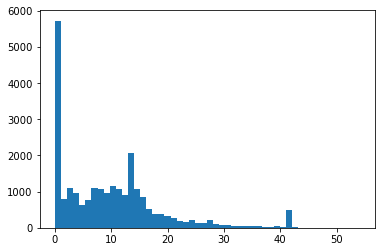

In [75]:
plt.hist(df_no_null['sport_count_2000'], bins = 50);

In [ ]:
df_no_sport = df_no_null.drop('sport_count_2000', axis = 1)
feature_selector = feature_selector.fit(X_train, y_train)
# visualize the results
print('Optimal number of features : %d' % feature_selector.n_features_)
plt.figure()
plt.xlabel('Number of features Selected')
plt.ylabel('Cross validation score')
plt.plot(range(1,len(feature_selector.grid_scores_) +1), feature_selector.grid_scores_)
plt.show()

### Using Ordinary Least Squares to check out serial correlation and feature importance relative to price_doc (y)

In [18]:
import statsmodels.api as sm

y = df_no_null['price_doc']
X = df_no_null.drop(['price_doc'], axis=1)
normalized_X = preprocessing.normalize(X)


X2 = sm.add_constant(X_normalized)
est = sm.OLS(y.values.reshape(-1,1) , X2)
est2 = est.fit()
#est2.summary(alpha=0.05)

### Durbin-Watson test statistic using lag-1 horizons indicate - with a value converging to 2 - that there is a very minimal risk of serial correlation. Therefore, a time series model is not required.
#### ***Need to move this up top since this needs to consider timestamp.

In [19]:
import statsmodels
resids = y_test-y_preds
print('Durbin-Watson test for serial correlation (lag-1 auto-correlation): {}'.format(round(statsmodels.stats.stattools.durbin_watson(resids, axis=0),3)))

Durbin-Watson test for serial correlation (lag-1 auto-correlation): 2.019


### A low adjusted r-squared indicates there is too much multi-collinearity in the data and the right features may not be included. Therefore, imputation is necessary.

In [131]:
print('Adjusted R-Square: {}'.format(round(est2.rsquared_adj, 3)))

Adjusted R-Square: 0.362


### The very low value of the smallest eigenvalue also indicates strong multi-collinearity by suggesting the matrix is close to singular

In [136]:
est2.eigenvals.min()

2.433704917934708e-28

In [20]:
print('Percent of features that are statistically significant: {}%'.format(round(est2.pvalues[est2.pvalues < 0.05].count() / est2.pvalues.count()*100, 2)))

Percent of features that are statistically significant: 51.16%


In [138]:
pval_names = list(est2.pvalues[est2.pvalues < 0.05].index)
pvals = list(est2.pvalues[est2.pvalues < 0.05].values)

In [139]:
stat_sig = pd.DataFrame(list(zip(pval_names, pvals)), columns=['feature','p-value'])
stat_sig.sort_values(by='p-value').reset_index(drop=True).head()

,feature,p-value
0,full_sq,0.000000e+00
1,cafe_count_2000_price_4000,1.424464e-12
2,culture_objects_top_25_no,8.620725e-11
3,culture_objects_top_25_yes,1.200802e-10
4,leisure_count_3000,3.930004e-10


After running a linear regression on the data without imputing any values and only using columns that do not have missing information, we have high error and cannot use this method to impute. Because of the high cardinality, we cannot treat the feature as categorical and apply a classification algorithm. Therefore, we impute with zero under the assumption not all sub_areas (neighborhoods) have hospitals. Furthermore, there are no splits on sub_areas; all sub_areas either have hospital bed counts or they do not, but there are no sub_areas that have randomly missing values.

## Hospital_bed_raion

In [140]:
print('Percent of hospital_beds_raion with missing values: {}%'.format(round(100*df['hospital_beds_raion'].isna().sum()/df.shape[0],2)))

Percent of hospital_beds_raion with missing values: 47.41%


In [21]:
neighborhoods = pd.concat([df['sub_area'],df['hospital_beds_raion']], axis=1)
s = neighborhoods.groupby(neighborhoods['sub_area']).sum()

#pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
s.sort_values(by='sub_area', ascending=True).head() # Missing values appear as 0

,hospital_beds_raion
sub_area,
Ajeroport,108120.0
Akademicheskoe,141930.0
Alekseevskoe,67760.0
Altuf'evskoe,0.0
Arbat,5620.0


### Hospital bed imputation
Because missing values for hospital_beds_raion are missing not at random - meaning neighborhoods that have values have values across all records whereas neighborhoods that do not have values have no values across all records - we will impute missing values for hospital_beds_raion with value zero.

In [22]:
df.loc[df['hospital_beds_raion'].isna(),'hospital_beds_raion'] = 0
df_test.loc[df_test['hospital_beds_raion'].isna(),'hospital_beds_raion'] = 0

In [23]:
df1 = pd.concat([df_no_null, df['hospital_beds_raion']], axis=1)
df1_test = pd.concat([df_no_null_test, df_test['hospital_beds_raion']], axis=1)

## Build Year
For this, we used an ensemble of a linear regression using all numeric features not containing NA and the median by sub_area for imputing build year. Mean squared error outperformed model baseline used to predict price_doc so using linear regression to impute for an input variable will not likely make the model worse.

### Median Imputation
To impute with median build_year, we needed to first eliminate the NA and outlier values. For this, we identified that years 0 and 20052009 existed in the dataset. We considered those to be the same as missing as well and dropped them from the dataset. We considered taking the average of 2005 and 2009 for the points with 20052009, but we decided it would be simpler to just impute over this value.

In [24]:
df2 = pd.concat([df_no_null.select_dtypes(include=['int64','float64']), df['hospital_beds_raion'], df['build_year'], df['sub_area']], axis=1)
df2_test = pd.concat([df_no_null_test.select_dtypes(include=['int64','float64']), df_test['hospital_beds_raion'], df_test['build_year'], df_test['sub_area']], axis=1)

### Apply build_year median-stratified imputation:
Treat future or ancient years as NaN so they will be imputed with the other NaNs

In [27]:
# df2 contains all original data and imputed hospital beds
df2.loc[(df2['build_year'] < 1500),'build_year'] = np.nan
df2.loc[(df2['build_year'] > 2020),'build_year'] = np.nan

df2_test.loc[(df2_test['build_year'] < 1500),'build_year'] = np.nan
df2_test.loc[(df2_test['build_year'] > 2020),'build_year'] = np.nan

Imputing each sub_area's missing build_year values by the median years. We selected the mean because of housing planning under a command-type economy where market demands don't exist to smooth construction over a duration of time. Instead, with command economies, housing construction is more likely to occurr in spurts, with no growth for many years. To prevent mitigating outliers in that scenario, we selected to impute build_year with the mean of each sub_area.

In [28]:
df2['build_year'] = df2['build_year'].fillna(df2.groupby('sub_area')['build_year'].transform('median'))
df2_test['build_year'] = df2_test['build_year'].fillna(df2_test.groupby('sub_area')['build_year'].transform('median'))

df2_test.loc[df2_test['sub_area']=='Poselenie Shhapovskoe', 'build_year'] = 2011
df2_test.loc[df2_test['sub_area']=='Poselenie Rogovskoe', 'build_year'] = 2015

Imputations appear well placed and follow the original distributions:

Summary statistics for all non-Poselenie Neighborhoods:

In [229]:
print('After stratify-imputing build_year values by sub_area:\n')
print('Non-Poselenie Mean build year: {}\nNon-Poselenie Median build year: {}'.format(floor(df2['build_year'].mean()), floor(df2['build_year'].median())))
print('\nNon-Poselenie Minimum build year: {}\nNon-Poselenie Maximum build year: {}'.format(floor(df2['build_year'].min()), floor(df2['build_year'].max())))

After stratify-imputing build_year values by sub_area:

Non-Poselenie Mean build year: 1990
Non-Poselenie Median build year: 1992

Non-Poselenie Minimum build year: 1860
Non-Poselenie Maximum build year: 2018


# Imputing state 
State is the condition of an apartment. We impute this column by predicting state based on age, sub_area, and priori values of states for the region.

In [29]:
df3 = pd.concat([df2, df['state']], axis=1)
df3_test = pd.concat([df2_test, df_test['state']], axis=1)

In [30]:
df3neigh = df3.copy()
df3lr = df3.copy() # categorical encodings for logistic regression

df3neigh_test = df3_test.copy()
df3lr_test = df3_test.copy() # categorical encodings for logistic regression

In [31]:
df3lr['sub_area'] = df3lr['sub_area'].astype('category').cat.codes
df3lr_test['sub_area'] = df3lr_test['sub_area'].astype('category').cat.codes

In [32]:
sub_area_onehots = pd.get_dummies(df3neigh['sub_area'].astype('category'))
sub_area_onehots_test = pd.get_dummies(df3neigh_test['sub_area'].astype('category'))

In [33]:
list(set(sub_area_onehots.columns) - set(sub_area_onehots_test.columns))

['Poselenie Kievskij',
 'Molzhaninovskoe',
 'Poselenie Mihajlovo-Jarcevskoe',
 'Poselenie Voronovskoe']

In [34]:
list(set(sub_area_onehots_test.columns) - set(sub_area_onehots.columns))

['Poselenie Klenovskoe']

In [35]:
sub_area_onehots_test = sub_area_onehots_test.reindex(columns = sub_area_onehots_test.columns.tolist() + ['Molzhaninovskoe','Poselenie Voronovskoe','Poselenie Kievskij','Poselenie Mihajlovo-Jarcevskoe'])
sub_area_onehots = sub_area_onehots.reindex(columns = sub_area_onehots.columns.tolist() + ['Poselenie Klenovskoe'])

sub_area_onehots_test['Molzhaninovskoe'] = 0
sub_area_onehots_test['Poselenie Voronovskoe'] = 0
sub_area_onehots_test['Poselenie Kievskij'] = 0
sub_area_onehots_test['Poselenie Mihajlovo-Jarcevskoe'] = 0
sub_area_onehots['Poselenie Klenovskoe'] = 0

print('Missing from sub_area_onehots_test: {}'.format(list(set(sub_area_onehots.columns) - set(sub_area_onehots_test.columns))))
print('Missing from sub_area_onehots: {}'.format(list(set(sub_area_onehots_test.columns) - set(sub_area_onehots.columns))))

Missing from sub_area_onehots_test: []
Missing from sub_area_onehots: []


In [36]:
df3neigh = pd.concat([df3neigh.drop('sub_area',axis=1), sub_area_onehots], axis=1) # drop sub_area because it's one-hot encoded
df3neigh_test = pd.concat([df3neigh_test.drop('sub_area',axis=1), sub_area_onehots_test], axis=1) # drop sub_area because it's one-hot encoded

In [37]:
corrcats = df3lr.corr()
corrhots = df3neigh.corr()

In [38]:
corrcats = pd.DataFrame(corrcats['state'])
corrcats['state'] = abs(corrcats['state'])

corrhots = pd.DataFrame(corrhots['state'])
corrhots['state'] = abs(corrhots['state'])

Below are the top 10 features correlating to state. We selected from this list the two features with an absolute value of correlation greater than 0.5 in addition to build_year, which was close to 0.5, but we felt is important to consider by virtue of it representing the age of a building.

In [39]:
print(corrcats.sort_values(by='state', ascending=False).head(11))
print(corrhots.sort_values(by='state', ascending=False).head(11))

                               state
state                       1.000000
product_type_Investment     0.700166
product_type_OwnerOccupier  0.700166
build_year                  0.439903
ekder_female                0.376200
ekder_all                   0.373505
raion_popul                 0.372106
work_all                    0.369557
work_male                   0.369380
work_female                 0.367467
ecology_no data             0.363921
                               state
state                       1.000000
product_type_OwnerOccupier  0.700166
product_type_Investment     0.700166
build_year                  0.439903
ekder_female                0.376200
ekder_all                   0.373505
raion_popul                 0.372106
work_all                    0.369557
work_male                   0.369380
work_female                 0.367467
ecology_no data             0.363921


In [40]:
gt_95 = corrhots.index[corrhots['state'] >= np.percentile(corrhots[corrhots.columns][~np.isnan(corrhots[corrhots.columns].values)], 95)].tolist()

In [41]:
gt_95.remove('state')

### K-Nearest Neighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier

df3neigh_train = df3neigh[~df3neigh['state'].isna()]
#model_X = pd.DataFrame(df3neigh_train, columns = ['product_type_Investment','product_type_OwnerOccupier','build_year'], dtype='int32')
model_X = pd.DataFrame(df3neigh_train.loc[:,gt_95], dtype='int32')
model_y = pd.DataFrame(df3neigh_train, columns = ['state'], dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(model_X, model_y, shuffle=True)
y_train_ravel = y_train.values.ravel()

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train_ravel)

neigh.predict(X_train)

print('K-NN accuracy: {}'.format(neigh.score(X_test, y_test, sample_weight=None)))

K-NN accuracy: 0.6152482269503546


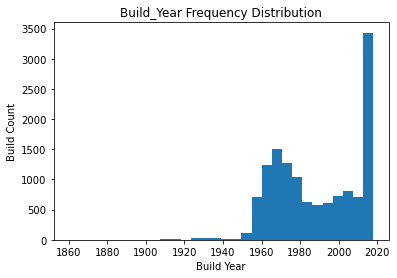

In [47]:
import matplotlib.pyplot as plt

plt.hist(df3lr['build_year'], bins=30)
plt.title('Build_Year Frequency Distribution')
plt.xlabel('Build Year')
plt.ylabel('Build Count');

### Predict the missing 'state' data

In [48]:
# Null State dataset
df3_null = df3neigh.loc[df3neigh['state'].isna(), :]
# Input features of the Null State dataset
df3_input = df3_null.loc[:,gt_95].astype('int64')# ['product_type_Investment','product_type_OwnerOccupier','build_year']].astype('int64')
# The No-Null dataset has no NULL values for state. Null dataset will be appended to this after imputing state
df3_nonull = df3neigh.loc[~df3neigh['state'].isna(),:]


# Null State dataset
df3_null_test = df3neigh_test.loc[df3neigh_test['state'].isna(), :]
# Input features of the Null State dataset
df3_input_test = df3_null_test.loc[:,gt_95].astype('int64')# ['product_type_Investment','product_type_OwnerOccupier','build_year']].astype('int64')
# The No-Null dataset has no NULL values for state. Null dataset will be appended to this after imputing state
df3_nonull_test = df3neigh_test.loc[~df3neigh_test['state'].isna(),:]

In [49]:
# Predict 'state'
missing_state_vals = neigh.predict(df3_input)
missing_state_vals_test = neigh.predict(df3_input_test)

In [51]:
np.unique(np.array(missing_state_vals))

array([1, 2, 3, 4])

In [50]:
np.unique(np.array(missing_state_vals_test))

array([1, 2, 3, 4])

In [ ]:
df3_null['state'] = missing_state_vals
df3_null_test['state'] = missing_state_vals_test

In [53]:
print('original values: {}'.format(df.state.unique()))
print('imputed values: {}'.format(np.unique(missing_state_vals)))

original values: [ 1.  2. nan  3.  4. 33.]
imputed values: [1 2 3 4]


## Final imputation of state

In [54]:
df3_final = df3_null.append(df3_nonull)
df3_final_test = df3_null_test.append(df3_nonull_test)

# Max floor

In [56]:
df4 = pd.concat([df['max_floor'],df3_final], axis=1).copy()
df4_test = pd.concat([df_test['max_floor'],df3_final_test], axis=1).copy()

In [402]:
df4.shape

(24376, 407)

In [403]:
df.shape

(24376, 292)

In [57]:
df4_null = df4.loc[df4['max_floor'].isna(),:]
df4_nonull = df4.loc[~df4['max_floor'].isna(),:]

df4_null_test = df4_test.loc[df4_test['max_floor'].isna(),:]
df4_nonull_test = df4_test.loc[~df4_test['max_floor'].isna(),:]

In [59]:
corr = df4_nonull.corr()

In [60]:
corrfloor = pd.DataFrame(corr['max_floor'])
corrfloor['max_floor'] = abs(corrfloor['max_floor'])

#print(corrfloor.sort_values(by='max_floor', ascending=False).head(26))

In [61]:
gt_95 = corrfloor.index[corrfloor['max_floor'] >= np.percentile(corrfloor[corrfloor.columns][~np.isnan(corrfloor[corrfloor.columns].values)], 95)].tolist()

### Building a model using the 95th percentile of features most correlated with max_floor.

## Impute max_floor

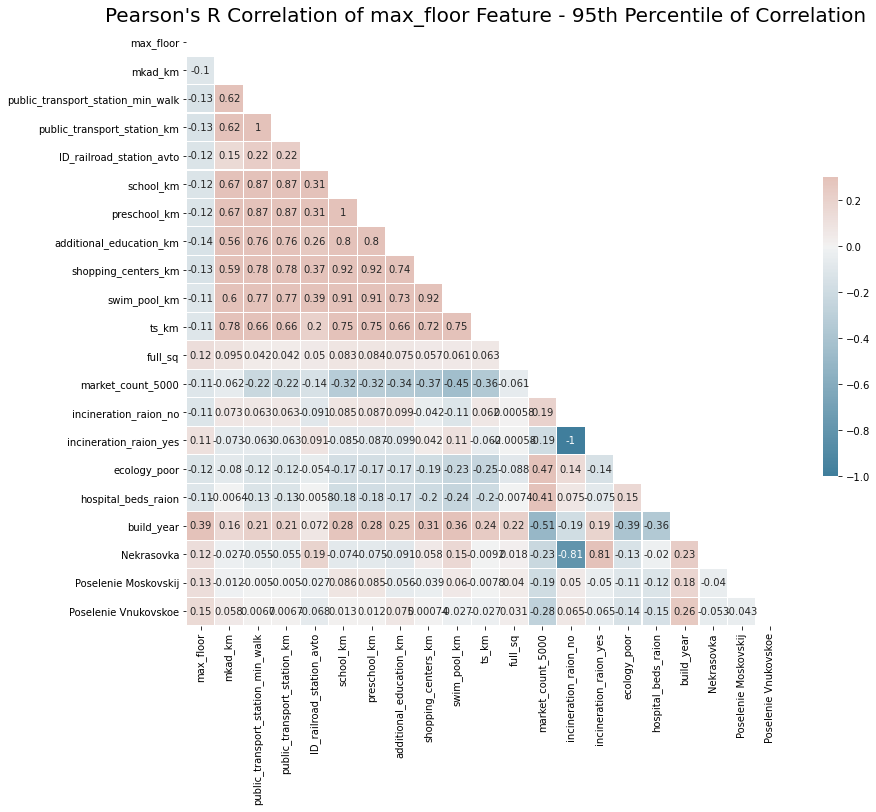

In [62]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr.loc[gt_95,gt_95], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14,11))
plt.title("Pearson's R Correlation of max_floor Feature - 95th Percentile of Correlation", fontsize = 20)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.loc[gt_95,gt_95], mask=mask, 
                            cmap=cmap,
                            vmax=.3, 
                            center=0, 
                            square=True, 
                            linewidths=.1, 
                            annot= True,
                            cbar_kws={"shrink": .5});

#### K-NN model for max_floor predicted on internal cross-validation with an accuracy of 49.57%. Because there are 48 floors (classes), this is a reasonable imputation method.

In [63]:
gt_95 = gt_95.remove('max_floor')

In [64]:
model_X = pd.DataFrame(df4_nonull, columns = gt_95, dtype='int64').drop('price_doc',axis=1)
model_y = pd.DataFrame(df4_nonull, columns = ['max_floor'], dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(model_X, model_y, test_size=0.33, random_state=42)

In [65]:
y_train_ravel = y_train.values.ravel()

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train.values.ravel())

neigh.predict(X_train)

print('K-NN accuracy: {}'.format(neigh.score(X_test, y_test.values.ravel(), sample_weight=None)))

K-NN accuracy: 0.49202320522117476


In [66]:
df4_null = df4_null.drop('max_floor',axis=1)
df4_null_test = df4_null_test.drop('max_floor',axis=1)

In [67]:
df4_null_test.loc[df4_null_test['preschool_quota'].isna(),'preschool_quota'] = 0
df4_null_test.loc[df4_null_test['school_quota'].isna(),'school_quota'] = 0

In [68]:
df4_input = pd.DataFrame(df4_null, columns = gt_95, dtype='float64')

missing_max_floor_vals = neigh.predict(df4_input)

df4_input_test = pd.DataFrame(df4_null_test, columns = gt_95, dtype='float64')

missing_max_floor_vals_test = neigh.predict(df4_input_test)

In [69]:
df4_null['max_floor'] = missing_max_floor_vals.copy()
df4_null_test['max_floor'] = missing_max_floor_vals_test.copy()

In [70]:
df4_final = df4_null.append(df4_nonull)
df4_final_test = df4_null_test.append(df4_nonull_test)

## Material

In [500]:
df4_final.shape

(24376, 407)

In [71]:
df5 = pd.concat([df['material'], df4_final], axis=1).copy()
df5_test = pd.concat([df_test['material'], df4_final_test], axis=1).copy()

In [72]:
df5_null = df5.loc[df5['material'].isna(),:]
df5_nonull = df5.loc[~df5['material'].isna(),:]

df5_null_test = df5_test.loc[df5_test['material'].isna(),:]
df5_nonull_test = df5_test.loc[~df5_test['material'].isna(),:]

In [74]:
corr = df5_nonull.corr()

In [75]:
corrmat = pd.DataFrame(corr['material'])
corrmat['material'] = abs(corrmat['material'])

print(corrmat.sort_values(by='material', ascending=False).head(14))

                                   material
material                           1.000000
incineration_raion_no              0.112190
incineration_raion_yes             0.112190
preschool_quota                    0.110566
ecology_good                       0.110456
school_quota                       0.096572
Poselenie Filimonkovskoe           0.096375
sport_count_5000                   0.096212
ID_big_road2                       0.095217
Nekrasovka                         0.091901
ID_railroad_terminal               0.089944
ecology_poor                       0.089529
office_sqm_5000                    0.089161
preschool_education_centers_raion  0.080061


### There are not a lot of strong correlators for material so we use everything with a coefficient correlation greater than 0.075

In [76]:
top_14 = corrmat.sort_values(by='material', ascending=False).head(14)

In [78]:
gt_75 = list(top_14[1:].index)

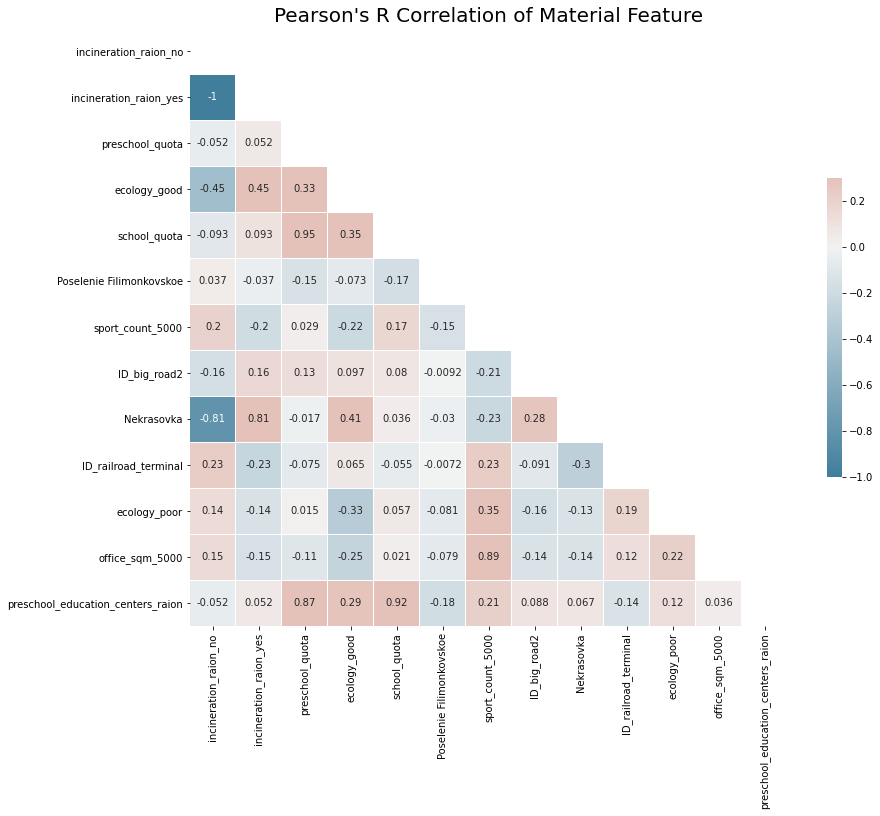

In [79]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr.loc[gt_75,gt_75], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14,11))
plt.title("Pearson's R Correlation of Material Feature", fontsize = 20)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.loc[gt_75,gt_75], mask=mask, 
                            cmap=cmap,
                            vmax=.3, 
                            center=0, 
                            square=True, 
                            linewidths=.1, 
                            annot= True,
                            cbar_kws={"shrink": .5});

In [80]:
model_X = pd.DataFrame(df5_nonull, columns = gt_75, dtype='int64')
model_y = pd.DataFrame(df5_nonull, columns = ['material'], dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(model_X, model_y, test_size=0.33, random_state=42)

## K-Nearest Neighbors

Based on the high cardinality in the floor counts we used K-NN to impute the missing material values. There are three one-hot encoded neighborhoods (sub_area) we used for this - Poselenie Filimonkovskoe, Nekrasovka, and Nagatinskij Zaton - which seem to have some correlation beyond complete randomness. We used additional features such as railroad terminal proximity, ecology, and inceneration raion to predict missing material values. This produced a reasonable accuracy.

In [81]:
y_train_ravel = y_train.values.ravel()

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train.values.ravel())

neigh.predict(X_train)

print('K-NN accuracy: {}'.format(neigh.score(X_test, y_test.values.ravel(), sample_weight=None)))

K-NN accuracy: 0.6820159535895577


In [82]:
df5_input = pd.DataFrame(df5_null, columns = gt_75, dtype='int64')
df5_input_test = pd.DataFrame(df5_null_test, columns = gt_75, dtype='int64')
missing_material_vals = neigh.predict(df5_input)
missing_material_vals_test = neigh.predict(df5_input_test)

In [83]:
missing_material_vals_test.shape

(1911,)

## Impute Material

In [ ]:
df5_null['material'] = missing_material_vals
df5_null_test['material'] = missing_material_vals_test

In [85]:
df5_final = df5_null.append(df5_nonull)
df5_final_test = df5_null_test.append(df5_nonull_test)

## Num_Room

In [86]:
df6_test = pd.concat([df_test['num_room'], df5_final_test], axis=1).copy()
df6_null_test = df6_test.loc[df6_test['num_room'].isna(),:]
df6_nonull_test = df6_test.loc[~df6_test['num_room'].isna(),:]

df6 = pd.concat([df['num_room'], df5_final], axis=1).copy()
df6_null = df6.loc[df6['num_room'].isna(),:]
df6_nonull = df6.loc[~df6['num_room'].isna(),:]

corr = df6_nonull.corr()

In [87]:
corrnum = pd.DataFrame(corr['num_room'])
corrnum['num_room'] = abs(corrnum['num_room'])

#print(corrnum.sort_values(by='num_room', ascending=False).head(20))

In [88]:
top_80 = corrnum.sort_values(by='num_room', ascending=False).head(20).drop('price_doc')

In [89]:
gt_80 = list(top_80[1:].index)

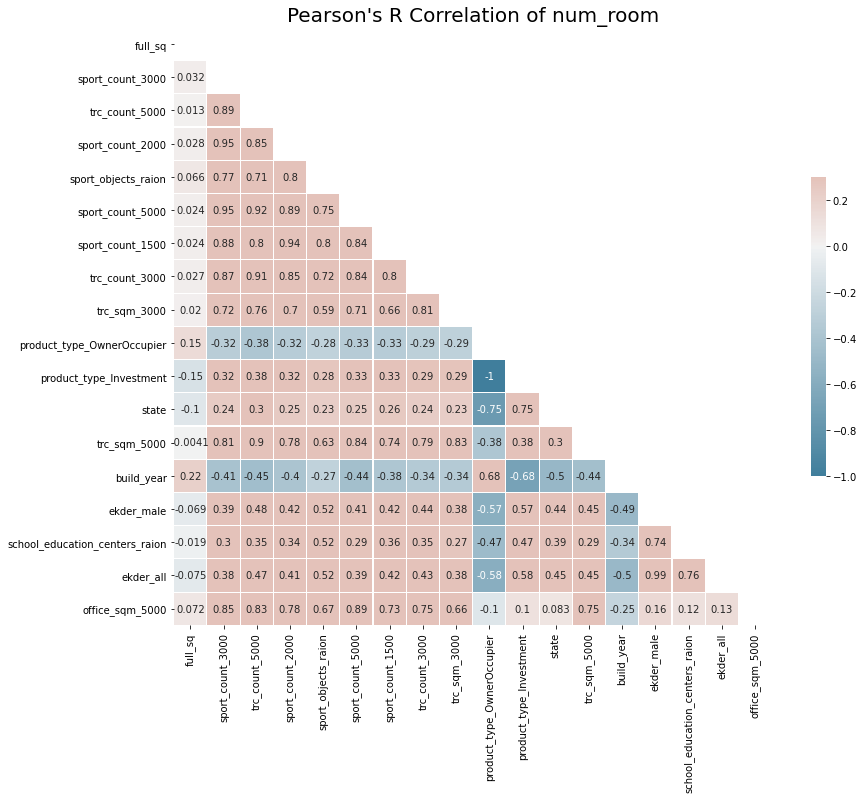

In [90]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr.loc[gt_80,gt_80], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14,11))
plt.title("Pearson's R Correlation of num_room", fontsize = 20)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.loc[gt_80,gt_80], mask=mask, 
                            cmap=cmap,
                            vmax=.3, 
                            center=0, 
                            square=True, 
                            linewidths=.1, 
                            annot= True,
                            cbar_kws={"shrink": .5});

In [91]:
model_X = pd.DataFrame(df6_nonull, columns = gt_80, dtype='int64')
model_y = pd.DataFrame(df6_nonull, columns = ['num_room'], dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(model_X, model_y, test_size=0.33, random_state=42)

In [92]:
y_train_ravel = y_train.values.ravel()

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train.values.ravel())

neigh.predict(X_train)

print('K-NN accuracy: {}'.format(neigh.score(X_test, y_test.values.ravel(), sample_weight=None)))

K-NN accuracy: 0.5830311820159536


In [93]:
df6_input = pd.DataFrame(df6_null, columns = gt_80, dtype='int64')
df6_input_test = pd.DataFrame(df6_null_test, columns = gt_80, dtype='int64')

missing_num_room_vals = neigh.predict(df6_input)
missing_num_room_vals_test = neigh.predict(df6_input_test)

In [ ]:
df6_null['num_room'] = missing_num_room_vals
df6_null_test['num_room'] = missing_num_room_vals_test

In [95]:
print(df6_null['num_room'].isna().sum())
print(df6_null_test['num_room'].isna().sum())

0
0


## Impute Num_Room

In [96]:
df6_final = df6_null.append(df6_nonull)
df6_final_test = df6_null_test.append(df6_nonull_test)

In [97]:
df6_final_test.loc[df6_final_test['preschool_quota'].isna(),'preschool_quota'] = 0
df6_final_test.loc[df6_final_test['school_quota'].isna(),'school_quota'] = 0

## Floor

In [98]:
df7_test = pd.concat([df_test['floor'], df6_final_test], axis=1)
df7_null_test = df7_test.loc[df7_test['floor'].isna(),:]
df7_nonull_test = df7_test.loc[~df7_test['floor'].isna(),:]

df7 = pd.concat([df['floor'], df6_final], axis=1).copy()
df7_null = df7.loc[df7['floor'].isna(),:]
df7_nonull = df7.loc[~df7['floor'].isna(),:]

In [99]:
corr = df7_nonull.corr()

In [100]:
df7_nonull_test.shape

(6054, 411)

In [101]:
df7_nonull.shape

(24250, 411)

In [102]:
corrfloor2 = pd.DataFrame(corr['floor'])
corrfloor2['floor'] = abs(corrfloor2['floor'])

#print(corrfloor2.sort_values(by='floor', ascending=False).head(16))

In [103]:
gt_95 = corrfloor2.index[corrfloor2['floor'] >= np.percentile(corrfloor2[corrfloor2.columns][~np.isnan(corrfloor2[corrfloor2.columns].values)], 95)].tolist()

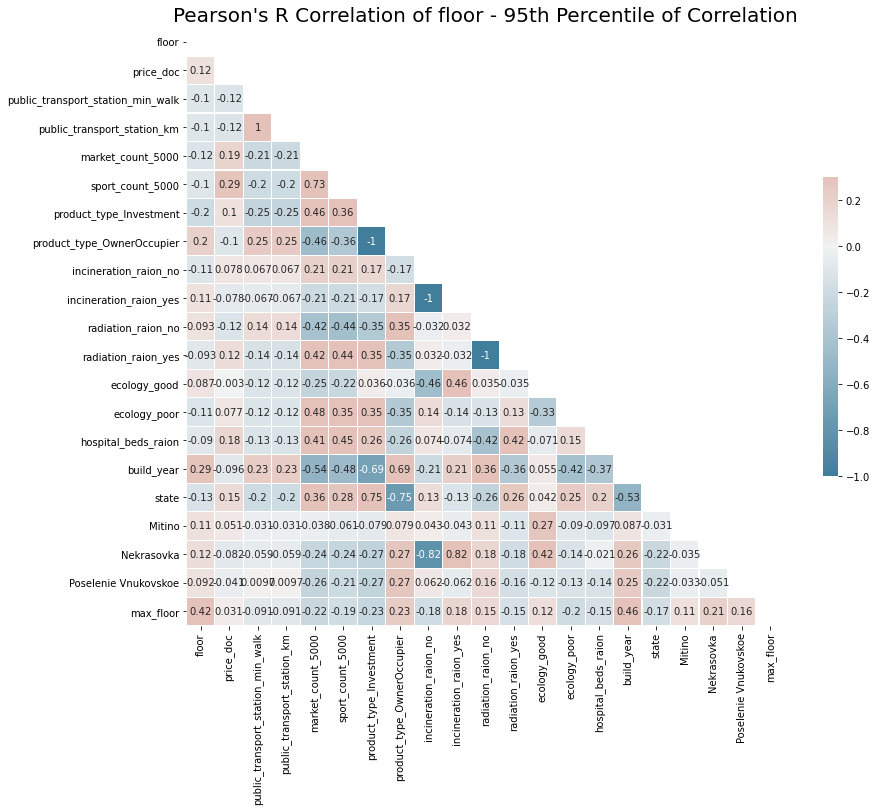

In [104]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr.loc[gt_95,gt_95], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14,11))
plt.title("Pearson's R Correlation of floor - 95th Percentile of Correlation", fontsize = 20)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.loc[gt_95,gt_95], mask=mask, 
                            cmap=cmap,
                            vmax=.3, 
                            center=0, 
                            square=True, 
                            linewidths=.1, 
                            annot= True,
                            cbar_kws={"shrink": .5});

#### We removed features that had strong correlation with other input features.
We gave preference to features that had not previously been imputed. While this may have resulted in less explanation of overall variation for the target (floor), we felt this conservative approach to be more appropriate and risk averse. We considered strong correlation to be greater than 0.5.

Where possible, we minimized re-using features used in imputing other features when there was reasonable correlation. We did this in an effort to preserve original, "intended" variation ("intended" in reference to the assumption missing values should not have been missing). One example of this was selecting sport_count_5000, which had been used to impute num_room. sport_count_5000 shares a Pearson's correlation coefficient greater than 0.733 with market_count_5000, but was used to impute num_room. Therefore, we used market_count_5000 to impute floor.

In [105]:
gt_95.remove('floor')

In [106]:
model_X = pd.DataFrame(df7_nonull, columns = gt_95, dtype='int64')
model_y = pd.DataFrame(df7_nonull, columns = ['floor'], dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(model_X, model_y, test_size=0.33, random_state=42)

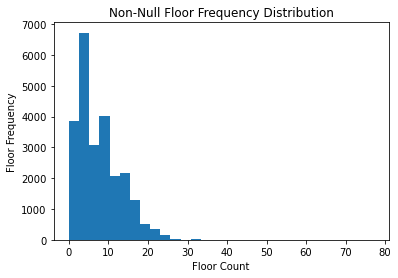

In [107]:
plt.hist(df7_nonull['floor'], bins=30);
plt.title('Non-Null Floor Frequency Distribution')
plt.xlabel('Floor Count')
plt.ylabel('Floor Frequency');

In [108]:
y_train_ravel = y_train.values.ravel()

neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train.values.ravel())

neigh.predict(X_train)

print('K-NN accuracy: {}'.format(neigh.score(X_test, y_test.values.ravel(), sample_weight=None)))

K-NN accuracy: 0.10071223291265775


In [109]:
df7_input = pd.DataFrame(df7_null, columns = gt_95, dtype='int64')
df7_input_test = pd.DataFrame(df7_null_test, columns = gt_95, dtype='int64')

In [110]:
missing_floor2_vals = neigh.predict(df7_input)
missing_floor2_vals_test = neigh.predict(df7_input_test)

### The distribution of the K-NN model appears to provide a reasonable approximation to the Floor feature's non-missing distribution, despite having a poor accuracy (less than 10%). Therefore, we selected this approach over an alternative imputation method.

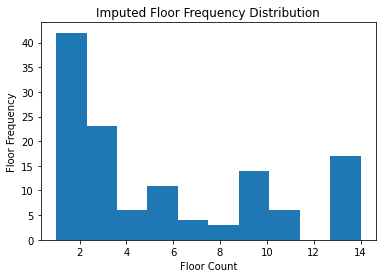

In [545]:
plt.hist(missing_floor2_vals)
plt.title('Imputed Floor Frequency Distribution')
plt.xlabel('Floor Count')
plt.ylabel('Floor Frequency');

## Impute Floor

In [ ]:
df7_null['floor'] = missing_floor2_vals
df7_null_test['floor'] = missing_floor2_vals_test

In [112]:
print(df7_null['floor'].isna().sum())
print(df7_null_test['floor'].isna().sum())

0
0


In [113]:
df7_final = df7_null.append(df7_nonull)
df7_final_test = df7_null_test.append(df7_nonull_test)

## Preschool_quota
Preschool_quota values were missing for all Poselenie sub_areas in addition to Molzhaninovskoe and Troickij okrug. Further analysis indicated there are preschool-aged children in these sub_areas, but preschool_education_centers_raion - a feature for the number of pre-school institutions - is 0. Therefore, we assume these values are not missing at random and are left empty because there are not seats available in pre-school organizations, which is what preschool_quota represents. Therefore, we impute all missing values for these sub_areas (account for all missing preschool_quota values total) with 0.

## School_quota
As with preschool_quota, missing values for school_quota appear to be missing not at random; the values missing correspond to the Poselenie districts and Troickij okrug. In these sub_areas, school_education_centers_raion and school_education_centeres_top_20_raion all have values of 0 where school quota is missing. Therefore, we interpret this as there being no seats (school_quota) available for children and impute with 0

Commenting out school_quota and preschool_quota because this is imputed upstream. Below was the original process below during EDA only.

In [566]:
# df8 = pd.concat([df7_final, df['school_quota'],df['preschool_quota']], axis=1)
# df8_test = pd.concat([df7_final_test, df_test['school_quota'],df_test['preschool_quota']], axis=1)

In [ ]:
# df8.loc[df8['school_quota'].isna(),'school_quota'] = 0
# df8.loc[df8['preschool_quota'].isna(),'preschool_quota'] = 0

# df8_test.loc[df8_test['school_quota'].isna(),'school_quota'] = 0
# df8_test.loc[df8_test['preschool_quota'].isna(),'preschool_quota'] = 0

In [114]:
df8 = df7_final.copy()
df8_test = df7_final_test.copy()

In [116]:
print(df8.preschool_quota.isna().sum())
print(df8.school_quota.isna().sum())

0
0


## Kitch_SQ
All missing values for kitch_sq are also missing alongside max_floor, material, build_year, num_room, and state. The values for the previous features were determined to be missing at random since they were not restricted to any particular value ranges and follow no distinctive patterns. Therefore, as with the aforementioned features, we impute kitch_sq using K-NN. Prior to K-NN, we use a correlation analysis to identify features most strongly associated with outcomes in kitch_sq.

### Impute Kitch_SQ

In [117]:
df9 = pd.concat([df.kitch_sq, df8], axis=1)
df9_test = pd.concat([df_test.kitch_sq, df8_test], axis=1)

In [118]:
print(df9.shape)
print(df.shape)

(24376, 412)
(24376, 292)


In [119]:
print(df9_test.shape)
print(df_test.shape)

(6095, 412)
(6095, 292)


In [120]:
df9_null_test = df9_test.loc[df9_test['max_floor'].isna(),:]
df9_nonull_test = df9_test.loc[~df9_test['max_floor'].isna(),:]

df9_null = df9.loc[df9['max_floor'].isna(),:]
df9_nonull = df9.loc[~df9['max_floor'].isna(),:]

In [121]:
corr = df9_nonull.corr()

In [122]:
corrkitch = pd.DataFrame(corr['kitch_sq'])
corrkitch['kitch_sq'] = abs(corrkitch['kitch_sq'])

#print(corrkitch.sort_values(by='kitch_sq', ascending=False).head(35))

There were no strong correlated values associated with non-missing values of kitch_sq. Therefore, we opted to predict kitch_sq using features with correlation in the top 95th percentile.

In [123]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
df9_final = imputer.fit_transform(df9)
df9_final_test = imputer.fit_transform(df9_test)

In [124]:
df9_final = pd.DataFrame(df9_final)
df9_final.columns = df9.columns

df9_final_test = pd.DataFrame(df9_final_test)
df9_final_test.columns = df9_test.columns

In [125]:
df9_final.kitch_sq.isna().sum()
df9_final_test.kitch_sq.isna().sum()

0

In [126]:
pauls_imputes_train = df9_final.loc[:,['kitch_sq','material','state','max_floor','school_quota','preschool_quota','floor','num_room','hospital_beds_raion','build_year']]
pauls_imputes_test = df9_final_test.loc[:,['kitch_sq','material','state','max_floor','school_quota','preschool_quota','floor','num_room','hospital_beds_raion','build_year']]

In [127]:
pauls_imputes_train.head(2)

,kitch_sq,material,state,max_floor,school_quota,preschool_quota,floor,num_room,hospital_beds_raion,build_year
0,8.0,1.0,2.0,9.0,11065.0,5001.0,4.0,2.0,240.0,1977.0
1,4.5,2.0,1.0,9.0,6237.0,3119.0,3.0,1.0,229.0,2014.0


In [128]:
pauls_imputes_test.head(2)

,kitch_sq,material,state,max_floor,school_quota,preschool_quota,floor,num_room,hospital_beds_raion,build_year
0,5.5,1.0,2.0,5.0,5050.0,933.0,10.0,1.0,4849.0,1957.0
1,6.0,1.0,3.0,12.0,11065.0,5001.0,5.0,2.0,240.0,1976.0


## Build_Count Features

The dataset also contains a large number of features that represent counts of homes with specific building materials. These features are counts of homes with materials, we will assume that missing values means that those materials are absent and we will impute them with 0 values. A more detailed justification of this decision is provided below.

Each of these features contain 4,991 missing values. The sub_area feature was appended to the build_count dataframe, revealing that sub-areas with the Polesenskie prefix contain all of the missing values across all of the build_count features. Of the subset of features having at least 1 missing value, a majority of the missing values were found to be in the `build_count_foam` and `build_count_panel`. Additionally, a correlation matrix revealed that `raion_build_count_with_builddate_info` and `raion_build_count_with_material_info` are almost perfectly correlated, so we chose to remove `raion_build_count_with_builddate_info` from the dataset.

In [602]:
X_train = X_train_copy
names = X_train.columns
# filtering column names for the build_count features
string = ['build_count']
build_cols = [i for i in names if any(sub in i for sub in string)]
# sub_area is appended to the list to find spatial correlations
build_cols.append('sub_area')

In [603]:
# creating a subset of the build_count features
build_count_df = X_train[build_cols]
build_count_df.describe()

,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995
count,20373.000000,20373.000000,20373.000000,20373.000000,20373.00000,20373.000000,20373.000000,20373.000000,20373.000000,20373.000000,20373.000000,20373.000000,20373.000000,20373.000000,20373.000000,20373.000000
mean,328.214745,50.196829,40.590536,4.947234,108.27988,11.977372,107.042900,0.165759,4.441859,0.572375,327.877534,18.888136,26.717126,141.552987,80.058656,60.660629
std,275.999953,46.654955,125.998235,14.867324,129.24004,19.060468,88.060836,1.134687,13.090118,1.529097,276.009649,60.771431,62.347671,125.290615,57.874105,112.529055
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,180.000000,13.000000,0.000000,0.000000,10.00000,2.000000,35.000000,0.000000,0.000000,0.000000,178.000000,0.000000,0.000000,14.000000,37.000000,14.000000
50%,273.000000,42.000000,0.000000,0.000000,67.00000,6.000000,92.000000,0.000000,0.000000,0.000000,271.000000,0.000000,2.000000,135.000000,71.000000,24.000000
75%,400.000000,72.000000,7.000000,1.000000,156.00000,13.000000,157.000000,0.000000,2.000000,0.000000,400.000000,3.000000,20.000000,216.000000,111.000000,57.000000
max,1681.000000,223.000000,793.000000,97.000000,664.00000,127.000000,431.000000,11.000000,84.000000,9.000000,1680.000000,371.000000,382.000000,845.000000,246.000000,799.000000


In [604]:
build_count_df.isnull().sum()

raion_build_count_with_material_info     4003
build_count_block                        4003
build_count_wood                         4003
build_count_frame                        4003
build_count_brick                        4003
build_count_monolith                     4003
build_count_panel                        4003
build_count_foam                         4003
build_count_slag                         4003
build_count_mix                          4003
raion_build_count_with_builddate_info    4003
build_count_before_1920                  4003
build_count_1921-1945                    4003
build_count_1946-1970                    4003
build_count_1971-1995                    4003
build_count_after_1995                   4003
sub_area                                    0
dtype: int64

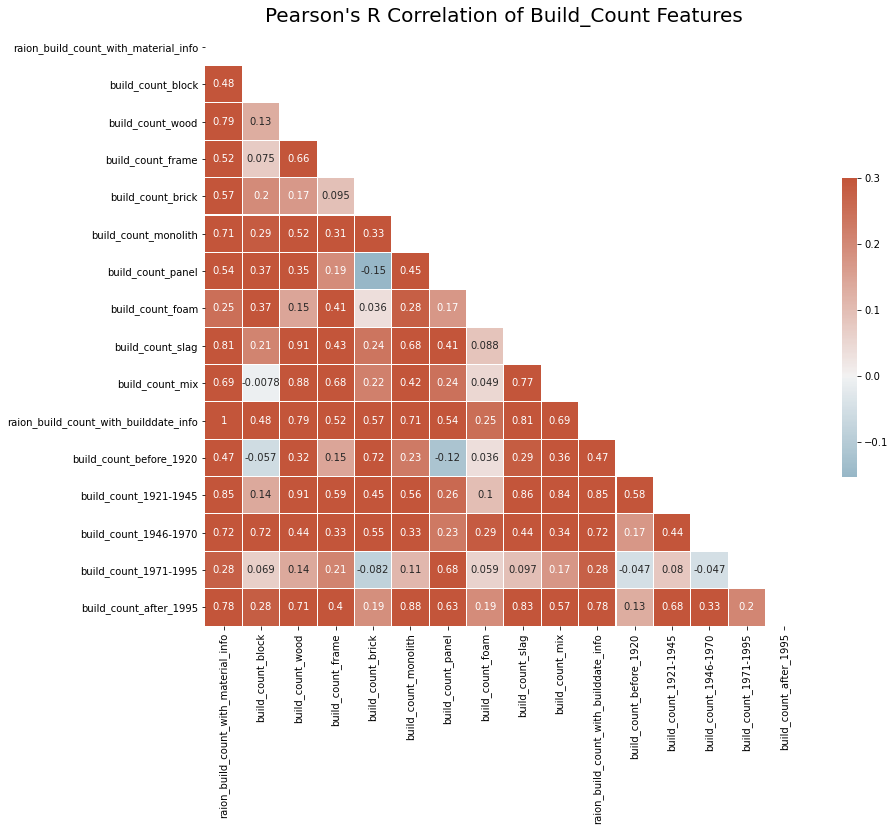

In [605]:
materials_corr = build_count_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(materials_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14,11))
plt.title("Pearson's R Correlation of Build_Count Features", fontsize = 20)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(materials_corr, mask=mask, 
                            cmap=cmap,
                            vmax=.3, 
                            center=0, 
                            square=True, 
                            linewidths=.1, 
                            annot= True,
                            cbar_kws={"shrink": .5});

In [606]:
p_regions = list(np.unique(build_count_df['sub_area']))
poselenie_areas = [i for i in p_regions if any(sub in i for sub in ['Pos'])]
poselenie_areas

['Poselenie Desjonovskoe',
 'Poselenie Filimonkovskoe',
 'Poselenie Kievskij',
 'Poselenie Kokoshkino',
 'Poselenie Krasnopahorskoe',
 'Poselenie Marushkinskoe',
 'Poselenie Mihajlovo-Jarcevskoe',
 'Poselenie Moskovskij',
 'Poselenie Mosrentgen',
 'Poselenie Novofedorovskoe',
 'Poselenie Pervomajskoe',
 'Poselenie Rjazanovskoe',
 'Poselenie Rogovskoe',
 'Poselenie Shhapovskoe',
 'Poselenie Shherbinka',
 'Poselenie Sosenskoe',
 'Poselenie Vnukovskoe',
 'Poselenie Voronovskoe',
 'Poselenie Voskresenskoe']

In [607]:
poselenie_df = build_count_df[build_count_df.sub_area.isin(poselenie_areas)]

poselenie_df.describe()

,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995
count,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.0,1231.0,1231.000000,1231.0,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000
mean,2.016247,0.096669,1.394801,0.190902,0.036556,0.004062,0.0,0.0,0.293258,0.0,2.016247,0.004062,0.004062,1.865963,0.048741,0.093420
std,11.379974,0.295627,7.646782,2.990519,0.572653,0.063628,0.0,0.0,0.455440,0.0,11.379974,0.063628,0.063628,9.028090,0.763537,1.463445
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.0,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,180.000000,1.000000,121.000000,47.000000,9.000000,1.000000,0.0,0.0,1.000000,0.0,180.000000,1.000000,1.000000,143.000000,12.000000,23.000000


In [560]:
nulls = build_count_df[build_count_df.isnull().any(axis=1)]
nulls['sub_area'].value_counts()

Poselenie Sosenskoe               1430
Poselenie Vnukovskoe              1090
Poselenie Voskresenskoe            581
Poselenie Filimonkovskoe           379
Poselenie Desjonovskoe             294
Poselenie Novofedorovskoe          126
Poselenie Rjazanovskoe              28
Poselenie Rogovskoe                 25
Poselenie Krasnopahorskoe           22
Poselenie Mosrentgen                17
Poselenie Voronovskoe                7
Poselenie Kievskij                   2
Poselenie Shhapovskoe                1
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, dtype: int64

In [561]:
for i in build_cols:
    X_train[i].fillna(0, inplace=True)

In [40]:
no_na = X_train.dropna()
no_na.shape

(4860, 291)

In [41]:
no_null_corr = no_na.corr()

In [564]:
life_corr = no_null_corr['life_sq'].sort_values(ascending=False)
life_corr.head(10)

life_sq                       1.000000
full_sq                       0.828458
num_room                      0.579404
price_doc                     0.498951
cafe_count_1000_price_2500    0.199475
cafe_count_1500_price_2500    0.199224
cafe_count_2000_price_high    0.198316
cafe_count_3000_price_4000    0.196827
cafe_count_2000_price_2500    0.196131
cafe_count_2000_price_4000    0.195775
Name: life_sq, dtype: float64

In [43]:
sq_ft_features = ['life_sq', 'full_sq', 'num_room']
full_sq_data = X_train[sq_ft_features]

## Multiple Imputation Strategies (Multiple Linear Regression and KNN)
### Multiple Linear Regression

In [44]:
imp = IterativeImputer(max_iter= 10000, random_state = random_state)

imp_train = imp.fit_transform(full_sq_data)
imp_test = imp.transform(X_test[sq_ft_features])

In [232]:
dfs = {'train--':imp_train, 'test--':imp_test}
for i, j in dfs.items():
    print(i, 'nan count: ', sum(np.isnan(j)), 'infinites: ', sum(np.isinf(j)), '\n')

train-- nan count:  [0 0 0] infinites:  [0 0 0] 

test-- nan count:  [0 0 0] infinites:  [0 0 0] 



### KNN Imputer

In [45]:
KNNimp = KNNImputer(n_neighbors = 3)

KNNimp_train = KNNimp.fit_transform(full_sq_data)
KNNimp_test = KNNimp.transform(X_test[sq_ft_features])

## Comparing the performance of Multiple Imputation Strategies

In [47]:
from sklearn.linear_model import ElasticNetCV
# instantiate the elastic net regularizer
EN = ElasticNetCV(l1_ratio = .5, 
                  cv = 5,
                  n_jobs = -1,
                  random_state = random_state)
# fit a model to the Iteratively Imputed training data
IIimputed_model = EN.fit(imp_train, y_train)
# fit the same model to the KNN Imputed training data
KNNimputed_model = EN.fit(KNNimp_train, y_train)
# predict the target using Iteratively Imputed test data
II_preds = IIimputed_model.predict(imp_test)
# predict the target using KNN imputed test data
KNN_preds = KNNimputed_model.predict(KNNimp_test)

II_MSE = np.sqrt(np.mean((II_preds - y_test)**2))
KNN_MSE = np.sqrt(np.mean((KNN_preds - y_test)**2))
print('Iterative Imputed model error: ', II_MSE,
      '\nKNN Imputed model error: ', KNN_MSE)

Iterative Imputed model error:  4610419.12013875 
KNN Imputed model error:  4609582.3854771955


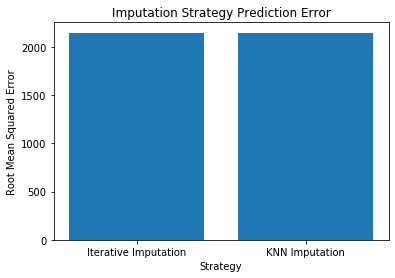

In [50]:
labels = ['Iterative Imputation', 'KNN Imputation']
errors = [np.sqrt(II_MSE), np.sqrt(KNN_MSE)]
plt.bar(range(2), errors)
plt.title('Imputation Strategy Prediction Error')
plt.xlabel('Strategy')
plt.ylabel('Root Mean Squared Error')
plt.xticks(range(2), labels)
plt.savefig('./images/imputation_strategies.png')
plt.show()

In [236]:
np.sqrt(II_MSE) -np.sqrt(KNN_MSE)

836.7346615623683

In [51]:
walking = [i for i in X_train.columns if any(sub in i for sub in ['walk'])]
walking

['metro_min_walk',
 'metro_km_walk',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'ID_railroad_station_walk',
 'public_transport_station_min_walk']

In [5]:
for i in walking:
    print(i, pd.isna(df[i]).sum())

metro_min_walk 25
metro_km_walk 25
railroad_station_walk_km 25
railroad_station_walk_min 25
ID_railroad_station_walk 25
public_transport_station_min_walk 0


In [52]:
walking_df = X_train[walking]
walking_corr = walking_df.corr()

### Walking Distance Features

Five walking distance features each have 25 missing data points. A Pearson's R correlation matrix reveals multicollinearity between features that account for walking distance and those that account for the time it takes to walk from one point to another. We will remove the walking time measurements, `metro_min_walk` and `railroad_station_walk_min` because they are the more subjective of the two.

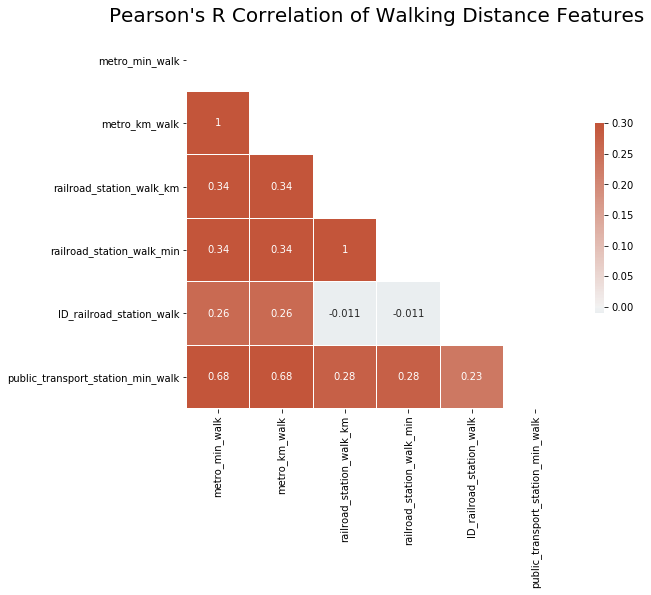

In [53]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(walking_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,7))
plt.title("Pearson's R Correlation of Walking Distance Features", fontsize = 20)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(walking_corr, mask=mask, 
                            cmap=cmap,
                            vmax=.3, 
                            center=0, 
                            square=True, 
                            linewidths=.1, 
                            annot= True,
                            cbar_kws={"shrink": .5})
plt.savefig('./images/corr_walking_dist.png');

In [14]:
droppers = ['metro_min_walk','railroad_station_walk_min']
X_train = X_train.drop(droppers, axis = 1)

In [17]:
walking = ['metro_km_walk', 'railroad_station_walk_km', 'ID_railroad_station_walk', 'sub_area']
df_walking = X_train[walking]

In [30]:
pd.options.display.max_rows = 25
walking_nulls = df_walking[df_walking.isnull().any(axis=1)]
walking_nulls

,metro_km_walk,railroad_station_walk_km,ID_railroad_station_walk,sub_area
10709,NaN,NaN,NaN,Timirjazevskoe
13259,NaN,NaN,NaN,Timirjazevskoe
13699,NaN,NaN,NaN,Begovoe
14796,NaN,NaN,NaN,Timirjazevskoe
15790,NaN,NaN,NaN,Vojkovskoe
17358,NaN,NaN,NaN,Timirjazevskoe
18255,NaN,NaN,NaN,Begovoe
19344,NaN,NaN,NaN,Timirjazevskoe
19370,NaN,NaN,NaN,Timirjazevskoe
19477,NaN,NaN,NaN,Timirjazevskoe


In [32]:
walking_subs = np.unique(walking_nulls['sub_area'])
walking_subs

array(['Begovoe', 'Krylatskoe', 'Ochakovo-Matveevskoe',
       'Poselenie Vnukovskoe', 'Timirjazevskoe', 'Vojkovskoe'],
      dtype=object)

### Imputing Walking Features

The missing walking data appear to be missing at random. Since there are only 25 of these missing values, we decided to use the median values for each feature as the imputed value rather than using a predictive technique. We rounded the walking distance features with a single digit of precision and the `ID_railroad_station_walk` feauture was imputed without any digits of precision because it is simply an identifier.

In [39]:
walking_sub_df = X_train[X_train.sub_area.isin(walking_subs)]
walking_sub_df = walking_sub_df[walking]
walking_sub_df.describe()

,metro_km_walk,railroad_station_walk_km,ID_railroad_station_walk
count,2050.000000,2050.000000,2050.000000
mean,2.676132,3.173610,47.477073
std,1.728267,1.403900,33.614089
min,0.115775,0.091549,10.000000
25%,1.722233,2.096932,24.000000
50%,2.200402,3.735666,24.000000
75%,3.220435,4.299245,63.000000
max,8.038429,7.816257,118.000000


In [52]:
X_train[X_train['metro_km_walk'].isnull()] = int(round(walking_sub_df['metro_km_walk'].median(),1))
X_train[X_train['railroad_station_walk_km'].isnull()] = int(round(walking_sub_df['railroad_station_walk_km'].median(),1))
X_train[X_train['ID_railroad_station_walk'].isnull()] = int(round(walking_sub_df['ID_railroad_station_walk'].median(),0))

In [53]:
for i in walking_sub_df.columns:
    print(i, sum(pd.isna(df[i])))

metro_km_walk 0
railroad_station_walk_km 0
ID_railroad_station_walk 0
sub_area 0


### Prom Features

In [63]:
prom = [i for i in X_train.columns if any(sub in i for sub in ['prom'])]
prom

['prom_part_500',
 'prom_part_1000',
 'prom_part_1500',
 'prom_part_2000',
 'prom_part_3000',
 'prom_part_5000']

In [55]:
for i in prom:
    print(i, sum(pd.isna(df[i])))

prom_part_500 0
prom_part_1000 0
prom_part_1500 0
prom_part_2000 0
prom_part_3000 0
prom_part_5000 178


In [64]:
prom.append('sub_area')
prom_df = df[prom]
prom_na = prom_df[prom_df.isna()]
prom_df.describe()

,prom_part_500,prom_part_1000,prom_part_1500,prom_part_2000,prom_part_3000,prom_part_5000
count,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30293.000000
mean,5.708097,8.771085,10.585864,11.212062,10.968362,10.341906
std,11.535957,11.510945,10.972875,9.638425,7.939677,5.672063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.210000
25%,0.000000,0.000000,1.520000,3.120000,4.220000,6.050000
50%,0.000000,3.990000,7.810000,8.800000,9.650000,8.960000
75%,5.760000,12.620000,15.310000,16.210000,15.730000,14.000000
max,98.770000,72.200000,63.000000,56.100000,45.100000,28.560000


In [67]:
corr = X_train.corr()
prom_5000_corr = corr['prom_part_5000'].sort_values(ascending =False)
prom_5000_corr.head(10)

prom_part_5000       1.000000
prom_part_3000       0.797736
market_count_5000    0.639495
prom_part_2000       0.508599
market_count_3000    0.500044
trc_count_5000       0.496383
trc_sqm_5000         0.461879
sport_count_5000     0.411527
market_count_2000    0.373343
prom_part_1500       0.365271
Name: prom_part_5000, dtype: float64

In [70]:
imp = IterativeImputer(max_iter= 10000, random_state = random_state)
KNNimp = KNNImputer(n_neighbors = 3)

prom_imputes = ['prom_part_5000','prom_part_3000','market_count_5000','prom_part_2000', 'price_doc']
prom_imputed = X_train[prom_imputes]

y = prom_imputed['price_doc']
X = prom_imputed.drop('price_doc', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = random_state)

In [72]:
II_imp_train = imp.fit_transform(X_train)
KNN_imp_train = KNNimp.fit_transform(X_train)

II_imp_test = imp.transform(X_test)
KNN_imp_test = KNNimp.transform(X_test)

In [74]:
from sklearn.linear_model import ElasticNetCV
# instantiate the elastic net regularizer
EN = ElasticNetCV(l1_ratio = .5, 
                  cv = 5,
                  n_jobs = -1,
                  random_state = random_state)
# fit a model to the Iteratively Imputed training data
IIimputed_model = EN.fit(II_imp_train, y_train)
# fit the same model to the KNN Imputed training data
KNNimputed_model = EN.fit(KNN_imp_train, y_train)
# predict the target using Iteratively Imputed test data
II_preds = IIimputed_model.predict(II_imp_test)
# predict the target using KNN imputed test data
KNN_preds = KNNimputed_model.predict(KNN_imp_test)

II_RMSE = np.sqrt(np.mean((II_preds - y_test)**2))
KNN_RMSE = np.sqrt(np.mean((KNN_preds - y_test)**2))
print('Iterative Imputed model error: ', II_RMSE,
      '\nKNN Imputed model error: ', KNN_RMSE)

Iterative Imputed model error:  4627826.959935145 
KNN Imputed model error:  4627823.174102521


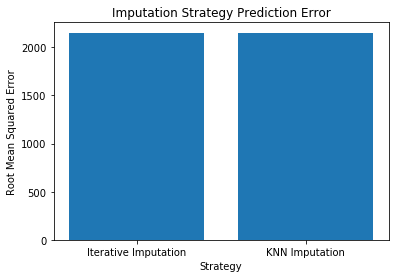

In [75]:
labels = ['Iterative Imputation', 'KNN Imputation']
errors = [np.sqrt(II_RMSE), np.sqrt(KNN_RMSE)]
plt.bar(range(2), errors)
plt.title('Imputation Strategy Prediction Error')
plt.xlabel('Strategy')
plt.ylabel('Root Mean Squared Error')
plt.xticks(range(2), labels)
plt.show()

In [80]:
prom_imputes.remove('price_doc')
X_train[prom_imputes] = KNNimp.transform(X_train[prom_imputes])

## Cafe Columns Imputation

The `min`/`max` columns are strongly correlated with the `avg price` column for each catgory (500, 1000, etc).
So we can drop the min/max variables.

/home/stuart/anaconda3/envs/tf2/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/stuart/anaconda3/envs/tf2/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


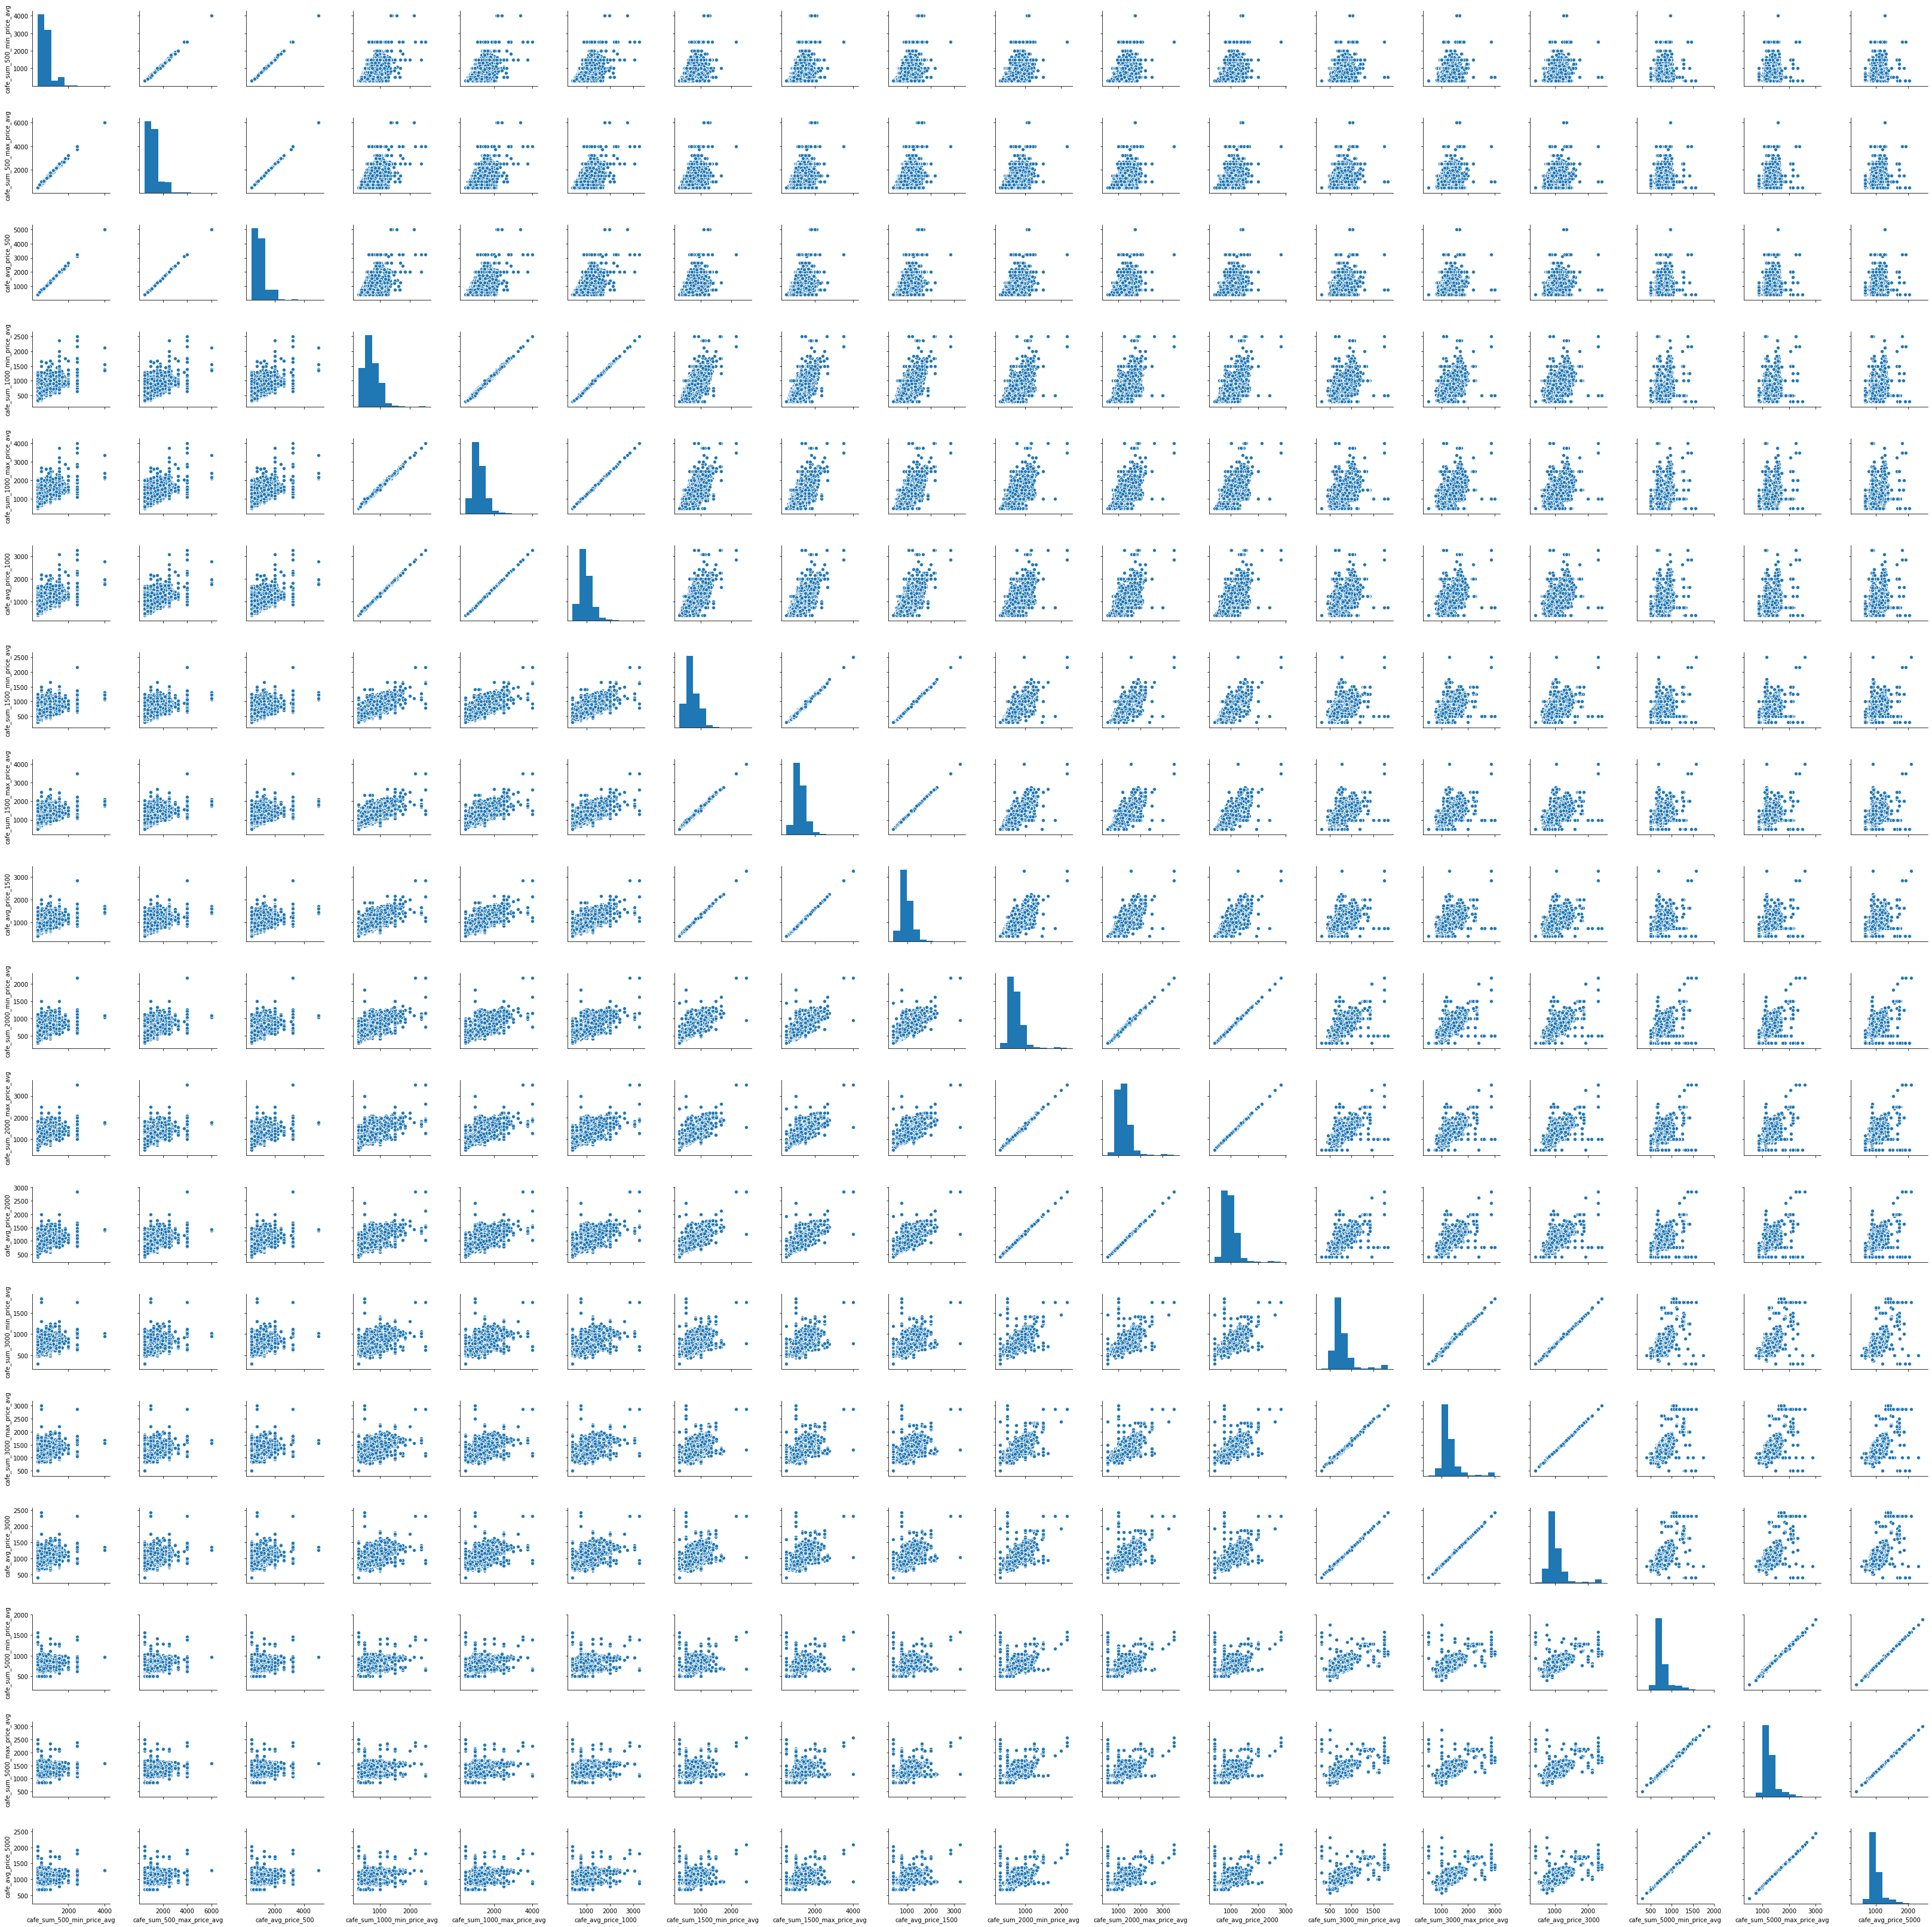

In [5]:
# the min/max columns are strongly correlated with 
# the avg_price column for each catgory (500, 1000, etc)
sns.pairplot(df[['cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg', 'cafe_avg_price_500',
                'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1000',
                'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg', 'cafe_avg_price_1500',
                'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg', 'cafe_avg_price_2000',
                'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg', 'cafe_avg_price_3000',
                'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000']])

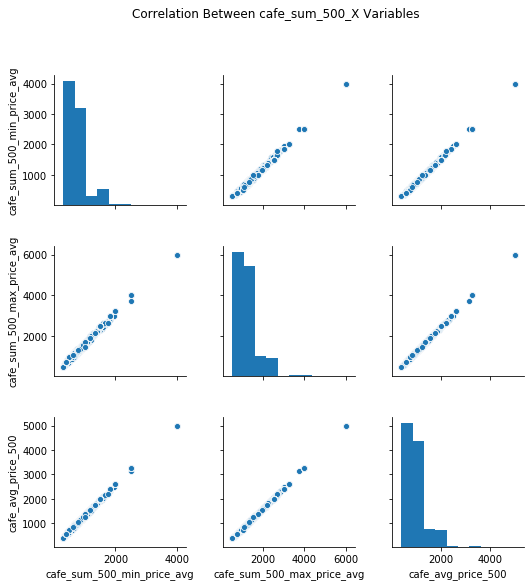

In [6]:
# the min/max columns are strongly correlated with 
# the avg_price column for each catgory (500, 1000, etc)
g = sns.pairplot(df[['cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg', 'cafe_avg_price_500']])
g.fig.suptitle('Correlation Between cafe_sum_500_X Variables', y=1.08);
g.savefig('./images/cafe_sum_500_X_pairplot.png')

In [7]:
# get all the compete columns
clean_columns = list((df.isna().sum() == 0)[(df.isna().sum() == 0)].index)
# compare a average price column to the complete columns (correlation)
print('Strongest Positive Correlations\n')
print(df[clean_columns + ['cafe_avg_price_500']].corr()['cafe_avg_price_500'].sort_values(ascending=False)[:5])
print('\nStrongest Negative Correlations\n')
print(df[clean_columns + ['cafe_avg_price_500']].corr()['cafe_avg_price_500'].sort_values(ascending=False)[-5:])

Strongest Positive Correlations

cafe_avg_price_500           1.000000
cafe_count_500_price_2500    0.229900
cafe_count_500_price_4000    0.229842
workplaces_km                0.210524
cafe_count_500_price_high    0.197076
Name: cafe_avg_price_500, dtype: float64

Strongest Negative Correlations

work_female    -0.241938
work_male      -0.242593
work_all       -0.243273
ekder_female   -0.244014
raion_popul    -0.245757
Name: cafe_avg_price_500, dtype: float64


In [8]:
caf_avg_price_cols = ['cafe_avg_price_500', 'cafe_avg_price_1000', 'cafe_avg_price_1500',
                  'cafe_avg_price_2000', 'cafe_avg_price_3000', 'cafe_avg_price_5000']
caf_count_cols = ['cafe_count_500', 'cafe_count_1000', 'cafe_count_1500',
                      'cafe_count_2000', 'cafe_count_3000', 'cafe_count_5000']

cafe_count = defaultdict(list)
missing_percent = defaultdict(list)

# get missing percent of cafe_avg_price_X by value of cafe_count_X
for caf_avg_price_col, caf_count_cal in zip(caf_avg_price_cols, caf_count_cols):
    for i in np.unique(df[caf_count_cal])[0:5]:
        missing_count = df[[caf_avg_price_col, caf_count_cal]].query(caf_count_cal + ' == ' + str(i)).isna().sum()[caf_avg_price_col]
        total_count = df[[caf_avg_price_col, caf_count_cal]].query(caf_count_cal + ' == '  + str(i)).shape[0]
        cafe_count[caf_count_cal].append(i)
        missing_percent[caf_avg_price_col].append(missing_count / total_count)

In [9]:
# get the counts of missing values for cafe_avg_price_500 by cafe_count_500 and sub_area
missing_freq = np.empty((np.unique(df.sub_area).size, 5))
for i, area in enumerate(np.unique(df.sub_area)):
    for j in range(1, 6):
        missing_freq[i,j-1] = df[['cafe_avg_price_500', 'cafe_count_500', 'sub_area']].query("sub_area == " + '"' + area + '"').query("cafe_count_500 == " + str(j)).isna().sum()['cafe_avg_price_500']

The heatmap below shows there is a missingness relationship between cafe count 500 and sub area

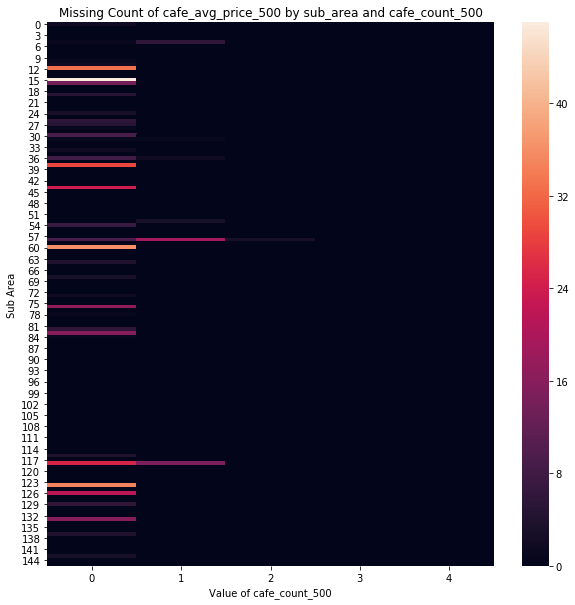

In [10]:
plt.subplots(figsize=(10,10))
g = sns.heatmap(missing_freq)
g.set_title('Missing Count of cafe_avg_price_500 by sub_area and cafe_count_500', y=1.08);
g.set_ylabel('Sub Area')
g.set_xlabel('Value of cafe_count_500');
#plt.savefig('./images/cafe_500_heatmap.png')

For each `cafe_avg_price` variable, there is a corresponding `cafe_count` variable.
When `cafe_count` is 0, the value for `cafe_avg_price` is missing.
Except for when `cafe_count` = 0, the missingness of `cafe_avg_price` appears to be random.
When `cafe_count` is greater than zero, the missingness of `cafe_avg_price` is low, but related to the value of `cafe_count`.
Additionally, the missingness of `cafe_avg_price` appears to be related to `sub_area`

```python
values = list()
print("|", "Sub Area", "|", "Missing Count", "|")
print("|", "-" * 27, "|", "-" * 3, "|", sep='')
for sub_area in np.unique(df.sub_area):
    missing = df.query('sub_area == "' + sub_area + '"')
    missing_count = missing.query('cafe_count_500 != 0')['cafe_avg_price_500'].isna().sum()
    if missing_count > 0:
        values.append(missing.query('cafe_count_500 != 0')['cafe_avg_price_500'].values)
    print("|", f"{sub_area:25s}", "|", f"{missing_count}", "|")
```

The distributions of cafe_avg_price_X appear to be irregular with outlier.
We will use the median for imputation.

/home/stuart/anaconda3/envs/tf2/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


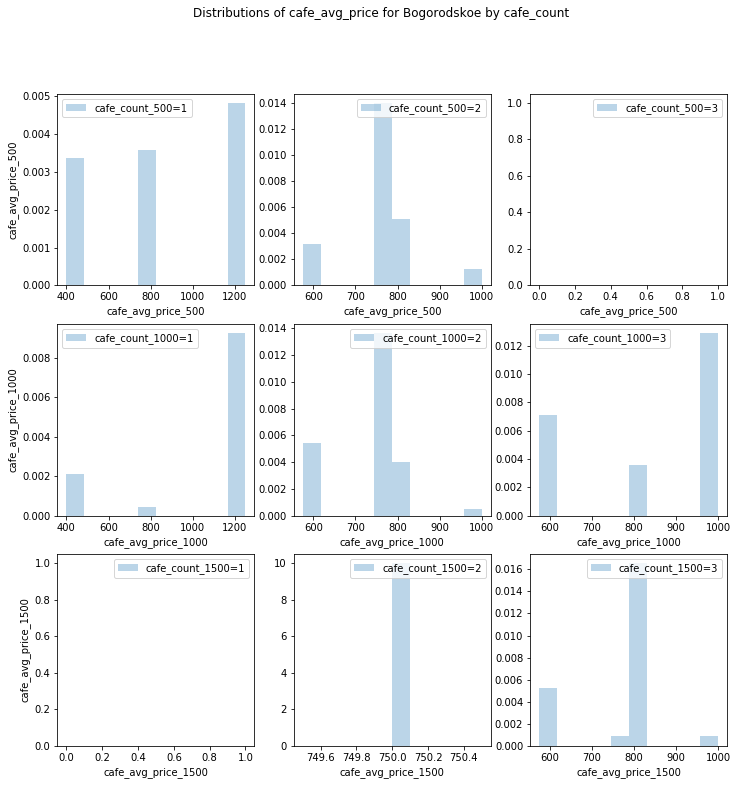

In [11]:
fig, ax = plt.subplots(nrows=len(caf_avg_price_cols[:3]), ncols=3, figsize=(12,12))
fig.suptitle('Distributions of cafe_avg_price for Bogorodskoe by cafe_count')
for i, caf_avg_price_col, caf_count_cal in zip([k for k in range(len(caf_avg_price_cols))][:3], caf_avg_price_cols[:3], caf_count_cols[:3]):
    
    #ax[i].set_title('Distribution of ' + caf_avg_price_col + ' Conditioned on ' + caf_count_cal)
    for j in np.unique(df[caf_count_cal])[1:4]:
        ax[i,j-1].hist(df.query(caf_count_cal + ' == ' + str(j)).query('sub_area == "Bogorodskoe"')[caf_avg_price_col],
                   label=caf_count_cal + '=' + str(j), alpha=0.3, density=True)
        ax[i,j-1].legend();
        ax[i,j-1].set_xlabel(caf_avg_price_col)
        if j-1 == 0:
            ax[i,j-1].set_ylabel(caf_avg_price_col)
fig.savefig('./images/distributions_of_caf_avg_price_col.png')

In [23]:
start_time = time.time()

missing_levels = dict()
for count_col in caf_count_cols:
    missing_levels[count_col] = np.unique(df[df[caf_avg_price_cols + caf_count_cols].isna().any(axis=1)][caf_count_cols][count_col])

sub_areas = dict()
for price_col in caf_avg_price_cols:
    sub_areas[price_col] = np.unique(df[df[[price_col] + ['sub_area']].isna().any(axis=1)].sub_area)

imputes = defaultdict(lambda: -1)
    
for caf_avg_price_col, caf_count_col in zip(caf_avg_price_cols, caf_count_cols):
    # print just to see it running
    print(caf_avg_price_col)
    for i in missing_levels[caf_count_col]:
        for sub_area in sub_areas[caf_avg_price_col]:
            idxes = df.query('sub_area == ' + '"' + sub_area + '"')[df[caf_avg_price_col].isna() & (df[caf_count_col]==i)][caf_avg_price_col].index
            # when value of count col is 0 set avg col to -1
            if i == 0:
                df.loc[idxes, caf_avg_price_col] = -1
                imputes[caf_avg_price_col + str(i) + sub_area] = -1
            else: # else use the median ignoring the nans
                if np.all(np.isnan(df[df[caf_count_col]==i][caf_avg_price_col])):
                    df.loc[idxes, caf_avg_price_col] = -1
                    imputes[caf_avg_price_col + str(i) + sub_area] = -1
                else:
                    df.loc[idxes, caf_avg_price_col] = np.nanmedian(df[df[caf_count_col]==i][caf_avg_price_col])
                    imputes[caf_avg_price_col + str(i) + sub_area] = np.nanmedian(df[df[caf_count_col]==i][caf_avg_price_col])


# drop the collinear columns
cafe_min_max_cols = ['cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg',
                     'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg',
                     'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg',
                     'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg',
                     'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg',
                     'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg',]
            
df = df.drop(cafe_min_max_cols, axis=1)


end_time = time.time()
duration = end_time - start_time
print(f'Run time:  {int(duration // 3600):02d}::{int((duration % 3600) // 60):02d}::{int((duration % 3600) % 60):02d}')

cafe_avg_price_500


/home/stuart/anaconda3/envs/tf2/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


cafe_avg_price_1000
cafe_avg_price_1500
cafe_avg_price_2000
cafe_avg_price_3000
cafe_avg_price_5000
Run time:  00::07::15


In [25]:
caf_avg_price_cols = ['cafe_avg_price_500', 'cafe_avg_price_1000', 'cafe_avg_price_1500',
                  'cafe_avg_price_2000', 'cafe_avg_price_3000', 'cafe_avg_price_5000']
caf_count_cols = ['cafe_count_500', 'cafe_count_1000', 'cafe_count_1500',
                      'cafe_count_2000', 'cafe_count_3000', 'cafe_count_5000']
# find levels with missing values
missing_levels = dict()
for count_col in caf_count_cols:
    missing_levels[count_col] = np.unique(X_train[X_train[caf_avg_price_cols + caf_count_cols].isna().any(axis=1)][caf_count_cols][count_col])
# find levels with missing values
sub_areas = dict()
for price_col in caf_avg_price_cols:
    sub_areas[price_col] = np.unique(X_train[X_train[[price_col] + ['sub_area']].isna().any(axis=1)].sub_area)
# save imputed values
imputes = defaultdict(lambda: -1)
# loop over training data to impute training data and save impute values
for caf_avg_price_col, caf_count_col in zip(caf_avg_price_cols, caf_count_cols):
    for i in missing_levels[caf_count_col]:
        for sub_area in sub_areas[caf_avg_price_col]:
            idxes = X_train.query('sub_area == ' + '"' + sub_area + '"')[X_train[caf_avg_price_col].isna() & (X_train[caf_count_col]==i)][caf_avg_price_col].index
            # when value of count col is 0 set avg col to -1
            if i == 0:
                X_train.loc[idxes, caf_avg_price_col] = -1
                imputes[caf_avg_price_col + str(i) + sub_area] = -1
            else: # else use the median ignoring the nans
                if np.all(np.isnan(X_train[X_train[caf_count_col]==i][caf_avg_price_col])):
                    X_train.loc[idxes, caf_avg_price_col] = -1
                    imputes[caf_avg_price_col + str(i) + sub_area] = -1
                else:
                    X_train.loc[idxes, caf_avg_price_col] = np.nanmedian(X_train[X_train[caf_count_col]==i][caf_avg_price_col])
                    imputes[caf_avg_price_col + str(i) + sub_area] = np.nanmedian(X_train[X_train[caf_count_col]==i][caf_avg_price_col])

cafe_avg_price_500


/home/stuart/anaconda3/envs/tf2/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/stuart/anaconda3/envs/tf2/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


cafe_avg_price_1000
cafe_avg_price_1500
cafe_avg_price_2000
cafe_avg_price_3000
cafe_avg_price_5000
